<a href="https://colab.research.google.com/github/Sundaypaul/PROJECTS/blob/main/ANALYSIS_ON_WORLD_HAPPINESS_REPORT_AND_LINEAR_REGRESSION_MODEL_TO_PREDICT_HAPPINESS_SCORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OGUNLEYE OLADAMOLA SUNDAY

# AIM: To analyse global trends in happiness and well-being

The data for this task is sourced from the **World Happiness Report**

# OBJECTIVES
1. Examine factors that influence happiness across
different countries and regions
2. Identify key drivers of well-being
3. Uncover patterns that highlight how various social, economic, and environmental factors contribute to overall happiness worldwide.

#IMPORT LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# machine learning
import keras
# data visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns


#LOAD DATASET

In [ ]:
Happiness_dataset = pd.read_csv('https://drive.google.com/uc?id=1xCeoWcobQnKmms2UatMuvwjDC1Z3PAxP')
df = Happiness_dataset

#view the first five rows of the dataset
print('Dataset loaded successfully.')
print(f'Total number of rows: {len(df)}\n\n')
df.head()

Dataset loaded successfully.
Total number of rows: 137




,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


# Dataset Overview


---



In [ ]:
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


In [ ]:
#Statistical overview of the dataset of the numerical column
print('This is the statistics of the columns with numerics \n')
df.describe()

This is the statistics of the columns with numerics 



,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898
std,1.139929,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.724000,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000
50%,5.684000,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000
75%,6.334000,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000
max,7.804000,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000


#handling missing values

In [ ]:
#checking out for the missing values across the columns
print('The missing values across the columns are as follows:')
missing_values = df.isna().sum()
print(missing_values)

print('\n\n')

# To add up the total missing value
total_missing = missing_values.sum()

print(f"There are {total_missing} missing values in the dataset.")


The missing values across the columns are as follows:
country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64



There are 1 missing values in the dataset.


In [ ]:
#A glance at the row with the missing value
first_missing_value_row = df[df.isna().any(axis=1)].iloc[0]
print(first_missing_value_row)


country                                   State of Palestine
region                          Middle East and North Africa
happiness_score                                        4.908
gdp_per_capita                                         1.144
social_support                                         1.309
healthy_life_expectancy                                  NaN
freedom_to_make_life_choices                           0.416
generosity                                             0.065
perceptions_of_corruption                              0.067
Name: 98, dtype: object


In [ ]:
mean_healthy_life_expectancy = df['healthy_life_expectancy'].mean()
modal_healthy_life_expectancy = df['healthy_life_expectancy'].mode()
median_healthy_life_expectancy = df['healthy_life_expectancy'].median()

print(f'The mean value of the healthy_life_expectancy: \t\t\t Answer = {mean_healthy_life_expectancy}\n')

print(f'The median value of the healthy_life_expectancy: \t\t\t Answer = {median_healthy_life_expectancy}\n')

print(f'The modal value of the healthy_life_expectancy: \t\t\t Answer = {modal_healthy_life_expectancy.tolist()}\n')


The mean value of the healthy_life_expectancy: 			 Answer = 0.36617647058823527

The median value of the healthy_life_expectancy: 			 Answer = 0.3895

The modal value of the healthy_life_expectancy: 			 Answer = [0.389, 0.535]



In [ ]:
df['healthy_life_expectancy'].value_counts()

,count
healthy_life_expectancy,
0.535,3
0.389,3
0.435,2
0.408,2
0.145,2
...,...
0.383,1
0.387,1
0.622,1


In [ ]:
# Check skewness of the 'healthy_life_expectancy' column
skewness = df['healthy_life_expectancy'].skew()
print(f"Skewness of healthy_life_expectancy: {skewness}")


Skewness of healthy_life_expectancy: -0.40835991641384844


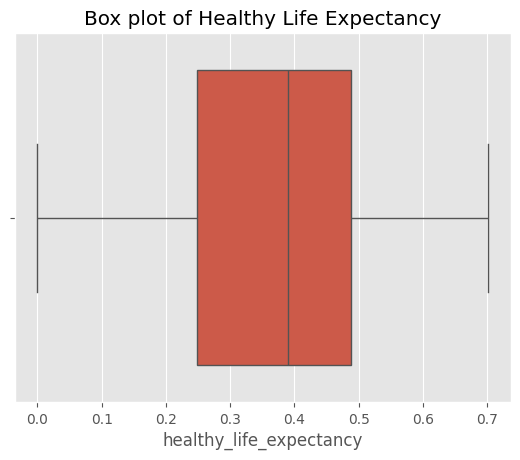

In [ ]:

# For a specific column like 'healthy_life_expectancy'
sns.boxplot(x=df['healthy_life_expectancy'])
plt.title('Box plot of Healthy Life Expectancy')
plt.show()


In [ ]:
Q1 = df['healthy_life_expectancy'].quantile(0.25)
Q3 = df['healthy_life_expectancy'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['healthy_life_expectancy'] < lower_bound) | (df['healthy_life_expectancy'] > upper_bound)]
print(f"Outliers in healthy_life_expectancy:\n{outliers}")


Outliers in healthy_life_expectancy:
Empty DataFrame
Columns: [country, region, happiness_score, gdp_per_capita, social_support, healthy_life_expectancy, freedom_to_make_life_choices, generosity, perceptions_of_corruption]
Index: []


If the data is approximately normal and has no significant outliers, you can use the mean.

If the data is skewed or contains outliers, the median would likely be a better choice.

If there's a clear repetitive pattern (e.g., a certain value occurs most frequently), and especially if there are multiple modes, you can use the mode.

We will fill the missing value with the mean value since there is no outlier



In [ ]:

df['healthy_life_expectancy'] = df['healthy_life_expectancy'].fillna(mean_healthy_life_expectancy)

# Convert the column to float
df['healthy_life_expectancy'] = df['healthy_life_expectancy'].astype(float)

# Check the data type
print(df['healthy_life_expectancy'].dtype)  # Should print: float64

float64


In [ ]:
df.isna().sum()

,0
country,0
region,0
happiness_score,0
gdp_per_capita,0
social_support,0
healthy_life_expectancy,0
freedom_to_make_life_choices,0
generosity,0
perceptions_of_corruption,0


In [ ]:
#to confirm it
df.isna().sum()

,0
country,0
region,0
happiness_score,0
gdp_per_capita,0
social_support,0
healthy_life_expectancy,0
freedom_to_make_life_choices,0
generosity,0
perceptions_of_corruption,0


In [ ]:
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


# Questions
1. What are the top 10 happiest and least happy countries?
2. How does happiness score vary across regions?
3. Is there a correlation between GDP per capita and happiness score?
4. What is the distribution of social support across countries?
5. How does healthy life expectancy impact happiness across regions?
6. Which regions have the highest perceptions of corruption?
7. Is there a link between generosity and happiness?
8. How does the freedom to make life choices relate to happiness?
9. What are the averages for each metric across regions?
10. Which countries deviate the most from the regional average happiness score?

# Number 1

In [ ]:
#To find the top 10 happiest and the least happy contries
#First, sort the values of the happiest scores from the highest to the lowest to have a glance at the scores

Happiness_scored_sorted = df['happiness_score'].sort_values(ascending=False)
print(f'Here is the sorted values: \n{Happiness_scored_sorted}')



Here is the sorted values: 
0      7.804
1      7.586
2      7.530
3      7.473
4      7.403
       ...  
132    3.207
133    3.204
134    3.138
135    2.392
136    1.859
Name: happiness_score, Length: 137, dtype: float64


In [ ]:
#Pair the scores with the countries using groupby()
country_by_happiness_score = df.groupby('country')['happiness_score'].max().sort_values(ascending=False)
print(f'Here is the output of the countries paired with their respective happiness score \n')
print(country_by_happiness_score.reset_index())
print('\n')
print(f'The top ten happiest countries and their happiness_score: \n\n{country_by_happiness_score.head(10).reset_index()} \n\n')
print(f'The 10 least happy countries and their happiness_score: \n\n{country_by_happiness_score.tail(10).reset_index()}')

Here is the output of the countries paired with their respective happiness score 

              country  happiness_score
0             Finland            7.804
1             Denmark            7.586
2             Iceland            7.530
3              Israel            7.473
4         Netherlands            7.403
..                ...              ...
132  Congo (Kinshasa)            3.207
133          Zimbabwe            3.204
134      Sierra Leone            3.138
135           Lebanon            2.392
136       Afghanistan            1.859

[137 rows x 2 columns]


The top ten happiest countries and their happiness_score: 

       country  happiness_score
0      Finland            7.804
1      Denmark            7.586
2      Iceland            7.530
3       Israel            7.473
4  Netherlands            7.403
5       Sweden            7.395
6       Norway            7.315
7  Switzerland            7.240
8   Luxembourg            7.228
9  New Zealand            7.123 


The 10 l

In [ ]:
#1a
top_ten_happiest_countries = country_by_happiness_score.head(10).reset_index()
#loop through the top_ten_happiest_countries to list out the countries
print(f"The top ten countries are: \n")
for country in top_ten_happiest_countries['country']:
  print(country)

The top ten countries are: 

Finland
Denmark
Iceland
Israel
Netherlands
Sweden
Norway
Switzerland
Luxembourg
New Zealand


In [ ]:
#1b
least_ten_happy_countries = country_by_happiness_score.tail(10).reset_index()
#loop through the least_ten_happy_countries to list out the countries
print(f"The least ten happy countries are: \n")
for country in least_ten_happy_countries['country']:
  print(country)

The least ten happy countries are: 

Zambia
Tanzania
Comoros
Malawi
Botswana
Congo (Kinshasa)
Zimbabwe
Sierra Leone
Lebanon
Afghanistan


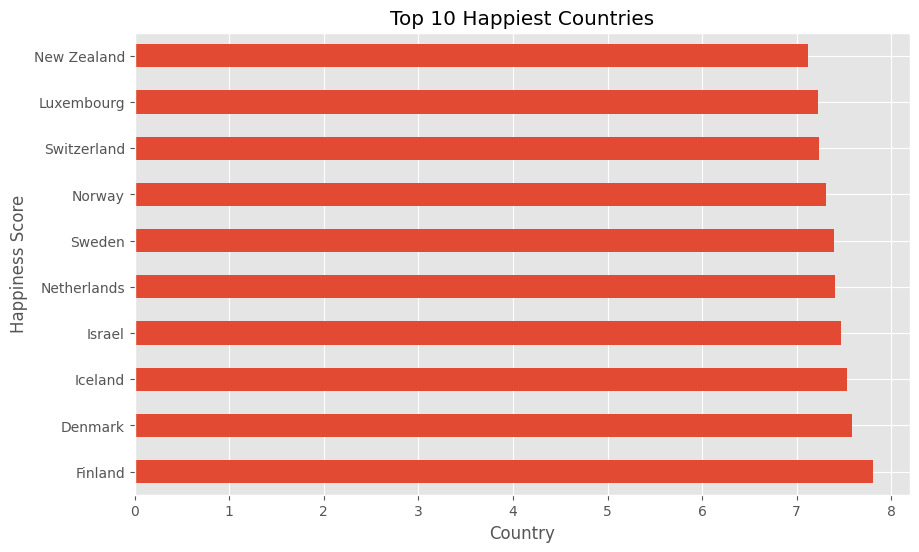

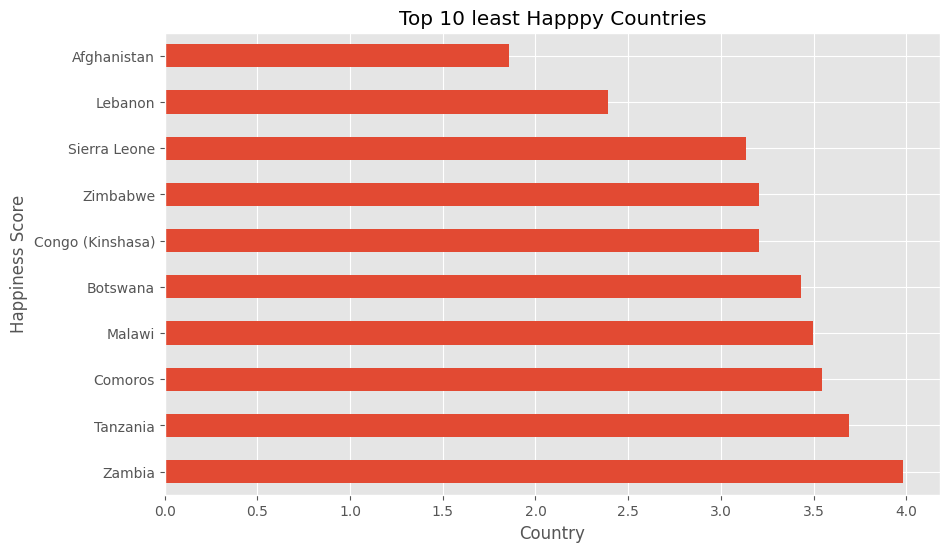

In [ ]:

# Graphic representation of the top happiest countries and the least happy country
country_by_happiness_score.head(10).plot(kind='barh', figsize=(10,6))
plt.title('Top 10 Happiest Countries')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.show()

print('\n\n\n')

country_by_happiness_score.tail(10).plot(kind='barh', figsize=(10,6))
plt.title('Top 10 least Happpy Countries')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.show()






The happiest country is **Finland** while **Afganistan** is the least happy country

#Number 2: How does happiness score vary across regions?

In [ ]:
Happiness_per_region = df.groupby('region')['happiness_score'].mean().sort_values(ascending=False)
print(Happiness_per_region)

region
North America and ANZ                 7.018250
Western Europe                        6.894350
Central and Eastern Europe            5.967091
Latin America and Caribbean           5.966053
East Asia                             5.930167
Commonwealth of Independent States    5.828250
Southeast Asia                        5.431222
Middle East and North Africa          5.102143
Sub-Saharan Africa                    4.382485
South Asia                            4.089000
Name: happiness_score, dtype: float64


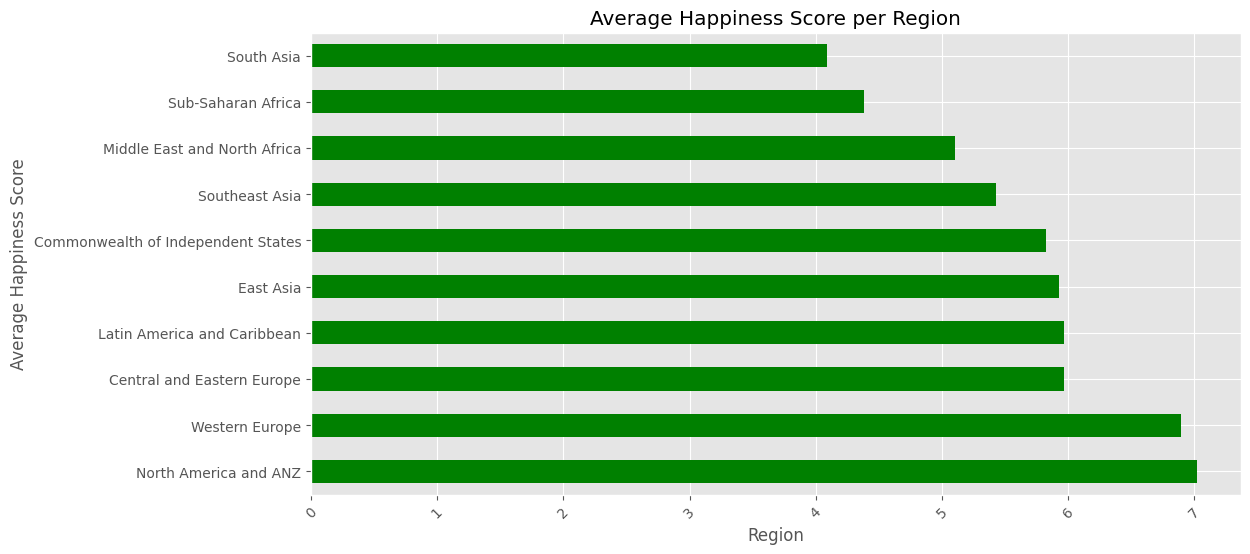

In [ ]:

# Plot the happiness scores per region
Happiness_per_region.plot(kind='barh', figsize=(12,6), color = 'green', linestyle = '--')
plt.title('Average Happiness Score per Region')
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=45)
plt.show()


The result for the categorization of the regions ba region shows that **North America and ANZ** is the happiest region while **South Asia** is the least happy region.

In [ ]:
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


#Number 3: Is there a correlation between GDP per capita and happiness score?

In [ ]:
# Calculate the 2x2 correlation matrix for 'gdp_per_capita' and 'happiness_score'
gdp_happiness_corr_matrix = df[['gdp_per_capita', 'happiness_score']].corr()

print("Correlation Matrix between GDP per Capita and Happiness Score:")
print(gdp_happiness_corr_matrix)
print('\n\n')
gdp_happiness_corr = df['gdp_per_capita'].corr(df['happiness_score'])
print(f"Correlation between GDP per Capita and Happiness Score: {gdp_happiness_corr}")


Correlation Matrix between GDP per Capita and Happiness Score:
                 gdp_per_capita  happiness_score
gdp_per_capita         1.000000         0.784342
happiness_score        0.784342         1.000000



Correlation between GDP per Capita and Happiness Score: 0.7843421846477893


A **correlation value** of *0.7843421846477893* indicates a strong correlation between the **gdp_per_capita** and the **happiness_score**.

# Number 4. What is the distribution of social support across countries?

In [ ]:
social_support_by_country = df.groupby('country')['social_support'].mean()
print(social_support_by_country)


country
Afghanistan    0.000
Albania        0.951
Algeria        1.298
Argentina      1.388
Armenia        1.134
               ...  
Uzbekistan     1.347
Venezuela      1.257
Vietnam        1.212
Zambia         0.890
Zimbabwe       0.881
Name: social_support, Length: 137, dtype: float64


In [ ]:
social_support_summary = df['social_support'].describe()
print(social_support_summary)


count    137.000000
mean       1.156212
std        0.326322
min        0.000000
25%        0.962000
50%        1.227000
75%        1.401000
max        1.620000
Name: social_support, dtype: float64


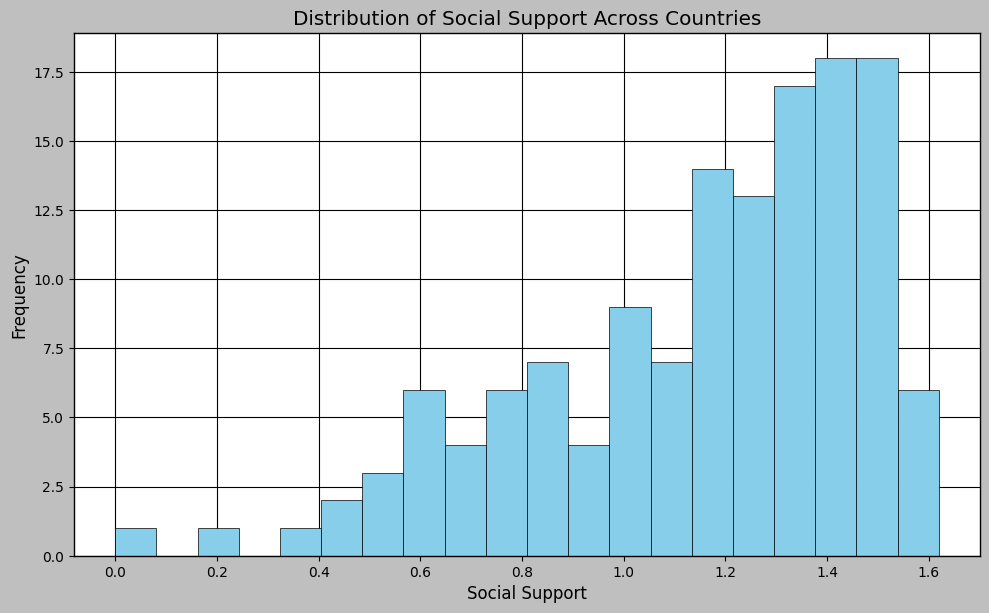

In [ ]:
plt.style.use('grayscale')
plt.figure(figsize=(10, 6))
plt.hist(df['social_support'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Social Support')
plt.ylabel('Frequency')
plt.tight_layout()
plt.title('Distribution of Social Support Across Countries')
plt.show()

#Number 5. How does healthy life expectancy impact happiness across regions?

In [ ]:
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')

In [ ]:
life_expectancy_happiness_per_region =df[['healthy_life_expectancy', 'region','happiness_score']]

In [ ]:
life_expectancy_happiness_per_region.head()

,healthy_life_expectancy,region,happiness_score
0,0.535,Western Europe,7.804
1,0.537,Western Europe,7.586
2,0.559,Western Europe,7.530
3,0.577,Middle East and North Africa,7.473
4,0.545,Western Europe,7.403


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       137 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


In [ ]:
#convert the healthy_life_expectancy column to numerics
#create a new column by multiplying the life_expentancy value with the happiness score
#find the mean by region

df['lifeexp_happiness'] = df['healthy_life_expectancy'] * df['happiness_score']

In [ ]:
df.isna().sum()

,0
country,0
region,0
happiness_score,0
gdp_per_capita,0
social_support,0
healthy_life_expectancy,0
freedom_to_make_life_choices,0
generosity,0
perceptions_of_corruption,0
lifeexp_happiness,0


In [ ]:
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,lifeexp_happiness
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,4.175140
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,4.073682
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,4.209270
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,4.311921
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,4.034635


In [ ]:

lifeexp_per_region = df.groupby('region')['lifeexp_happiness'].mean()
print(lifeexp_per_region)

region
Central and Eastern Europe            2.582149
Commonwealth of Independent States    2.156330
East Asia                             3.081652
Latin America and Caribbean           2.464011
Middle East and North Africa          2.072797
North America and ANZ                 3.470800
South Asia                            1.136176
Southeast Asia                        2.019069
Sub-Saharan Africa                    0.660966
Western Europe                        3.776004
Name: lifeexp_happiness, dtype: float64


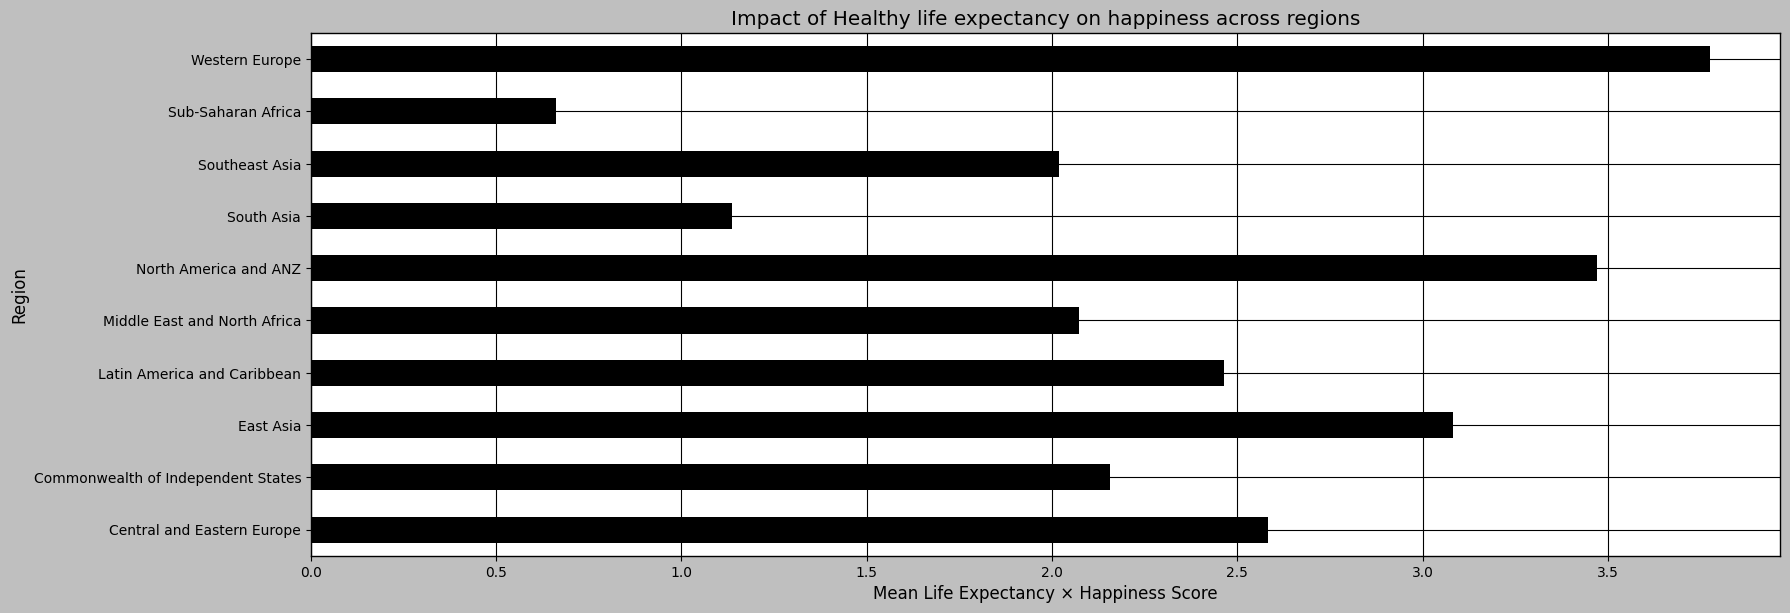

In [ ]:
plt.style.use('grayscale')
lifeexp_per_region.plot(kind = 'barh', figsize=(18, 6))
plt.xlabel('Mean Life Expectancy × Happiness Score')
plt.ylabel('Region')
plt.tight_layout()
plt.title('Impact of Healthy life expectancy on happiness across regions')
plt.show()



In [ ]:


lifeexp_per_region

,lifeexp_happiness
region,
Central and Eastern Europe,2.582149
Commonwealth of Independent States,2.156330
East Asia,3.081652
Latin America and Caribbean,2.464011
Middle East and North Africa,2.072797
North America and ANZ,3.470800
South Asia,1.136176
Southeast Asia,2.019069
Sub-Saharan Africa,0.660966


In [ ]:
Happiness_per_region

,happiness_score
region,
North America and ANZ,7.018250
Western Europe,6.894350
Central and Eastern Europe,5.967091
Latin America and Caribbean,5.966053
East Asia,5.930167
Commonwealth of Independent States,5.828250
Southeast Asia,5.431222
Middle East and North Africa,5.102143
Sub-Saharan Africa,4.382485


In [ ]:
#here is healthy_life_expectancy by region
healthy_life_expectancy_per_region = df.groupby('region')['healthy_life_expectancy'].mean()
print(healthy_life_expectancy_per_region)

region
Central and Eastern Europe            0.430545
Commonwealth of Independent States    0.368000
East Asia                             0.521833
Latin America and Caribbean           0.412158
Middle East and North Africa          0.401155
North America and ANZ                 0.494000
South Asia                            0.259833
Southeast Asia                        0.360333
Sub-Saharan Africa                    0.148788
Western Europe                        0.547800
Name: healthy_life_expectancy, dtype: float64


In [ ]:
# Merge the two DataFrames on the 'region' column
combined_df = pd.merge(Happiness_per_region, lifeexp_per_region, on='region', how='inner')

# Display the combined DataFrame
print(combined_df)


                                    happiness_score  lifeexp_happiness
region                                                                
North America and ANZ                      7.018250           3.470800
Western Europe                             6.894350           3.776004
Central and Eastern Europe                 5.967091           2.582149
Latin America and Caribbean                5.966053           2.464011
East Asia                                  5.930167           3.081652
Commonwealth of Independent States         5.828250           2.156330
Southeast Asia                             5.431222           2.019069
Middle East and North Africa               5.102143           2.072797
Sub-Saharan Africa                         4.382485           0.660966
South Asia                                 4.089000           1.136176


In [ ]:
combined_df = pd.merge(combined_df, healthy_life_expectancy_per_region, on='region', how='inner')

# Display the combined DataFrame
print(combined_df)

                                    happiness_score  lifeexp_happiness  \
region                                                                   
North America and ANZ                      7.018250           3.470800   
Western Europe                             6.894350           3.776004   
Central and Eastern Europe                 5.967091           2.582149   
Latin America and Caribbean                5.966053           2.464011   
East Asia                                  5.930167           3.081652   
Commonwealth of Independent States         5.828250           2.156330   
Southeast Asia                             5.431222           2.019069   
Middle East and North Africa               5.102143           2.072797   
Sub-Saharan Africa                         4.382485           0.660966   
South Asia                                 4.089000           1.136176   

                                    healthy_life_expectancy  
region                                           

In [ ]:
combined_df.sort_values(by='happiness_score')

,happiness_score,lifeexp_happiness,healthy_life_expectancy
region,,,
South Asia,4.089000,1.136176,0.259833
Sub-Saharan Africa,4.382485,0.660966,0.148788
Middle East and North Africa,5.102143,2.072797,0.401155
Southeast Asia,5.431222,2.019069,0.360333
Commonwealth of Independent States,5.828250,2.156330,0.368000
East Asia,5.930167,3.081652,0.521833
Latin America and Caribbean,5.966053,2.464011,0.412158
Central and Eastern Europe,5.967091,2.582149,0.430545
Western Europe,6.894350,3.776004,0.547800


In [ ]:
# Calculate the correlation between 'healthy_life_expectancy' and 'happiness_score'
correlation = combined_df[['healthy_life_expectancy', 'happiness_score']].corr()
print(correlation)
print('\n\n')
Hlifeexp_happiness_correlation = combined_df['healthy_life_expectancy'].corr(combined_df['happiness_score'])
print(f"Correlation between healthy life expectancy and Happiness Score: {Hlifeexp_happiness_correlation}")

                         healthy_life_expectancy  happiness_score
healthy_life_expectancy                 1.000000         0.870742
happiness_score                         0.870742         1.000000



Correlation between healthy life expectancy and Happiness Score: 0.870742456750056


In [ ]:
df.isna().sum()

,0
country,0
region,0
happiness_score,0
gdp_per_capita,0
social_support,0
healthy_life_expectancy,0
freedom_to_make_life_choices,0
generosity,0
perceptions_of_corruption,0
lifeexp_happiness,0


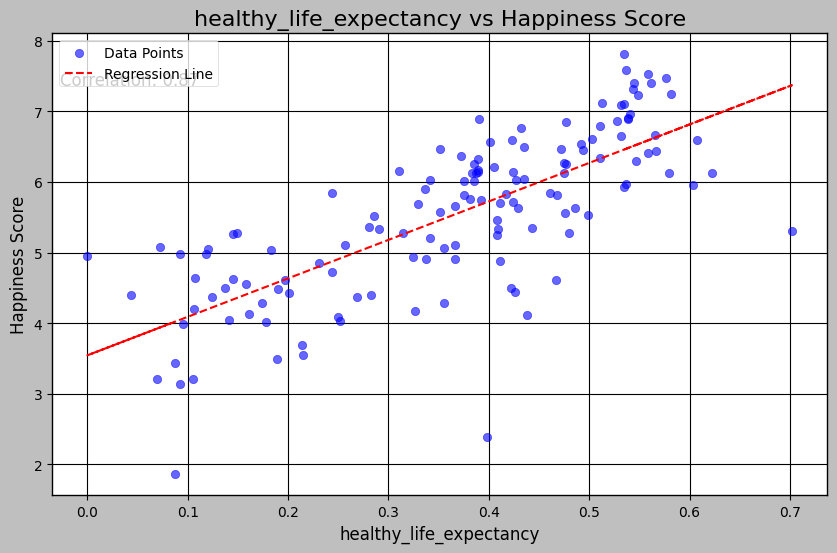

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['healthy_life_expectancy'], df['happiness_score'], color='blue', alpha=0.6, label='Data Points')

# Fit a regression line (simple linear regression) and plot it
# Fit a line using np.polyfit (degree 1 for linear fit)
slope, intercept = np.polyfit(df['healthy_life_expectancy'], df['happiness_score'], 1)
plt.plot(df['healthy_life_expectancy'], slope * df['healthy_life_expectancy'] + intercept, color='red', linestyle='--', label='Regression Line')

# Add labels and title
plt.title("healthy_life_expectancy vs Happiness Score", fontsize=16)
plt.xlabel("healthy_life_expectancy", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)

# Display the correlation value on the plot
plt.text(0.1, 0.9, f"Correlation: {Hlifeexp_happiness_correlation:.2f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='black')

# Show legend
plt.legend()

# Show plot
plt.show()

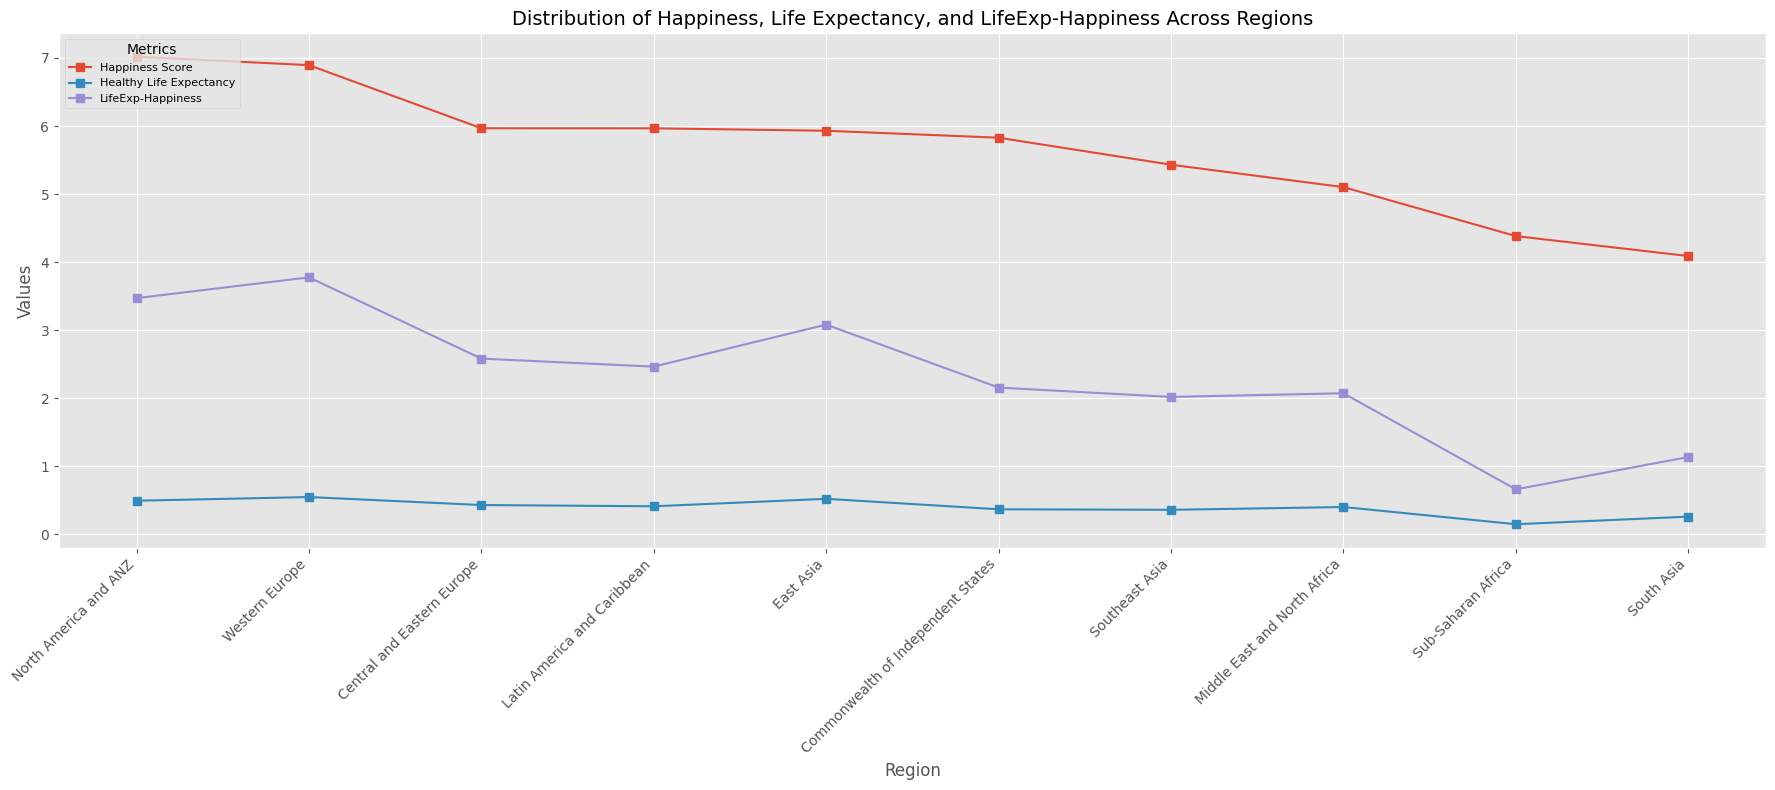

In [ ]:

plt.style.use('ggplot')
plt.figure(figsize=(18, 8))
plt.plot(combined_df.index, combined_df['happiness_score'], label="Happiness Score", marker="s")
plt.plot(combined_df.index, combined_df['healthy_life_expectancy'], label="Healthy Life Expectancy", marker="s")
plt.plot(combined_df.index, combined_df['lifeexp_happiness'], label="LifeExp-Happiness", marker="s")
plt.xlabel("Region")
plt.ylabel("Values")
plt.title("Distribution of Happiness, Life Expectancy, and LifeExp-Happiness Across Regions", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metrics", fontsize=8, loc='upper left')
plt.tight_layout()
plt.show()


The correlation score of *0.86* between the Healthy Life expectancy and the happiness score indicates a strong relationship.
From the graph, we see that as life expectancy increases, happiness score increases except in the region **Latin America and Caribbean** where there is a slight change in pattern as seen in the graph.

**East Asia** has a high healthy life expectancy *0.521833*, but its happiness score *5.930167* is lower than **North America and ANZ** despite comparable life expectancy. This suggests other cultural, economic, or societal factors may also play a role.
While **North America and ANZ** has the highest happiness score, **East Asia** and **Western Europe** have higher life expectancy showing there are other factors impacting life expectancy. However, at the interplay between these values, **Western Europe** has the highest indicating that life expectancy can improve the overall happiness of the region.
In general, we can conclude that the happier the people, the longer they live.

#Number 6. Which regions have the highest perceptions of corruption?

In [ ]:
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'lifeexp_happiness'],
      dtype='object')

In [ ]:
df['perceptions_of_corruption'].dtypes

dtype('float64')

In [ ]:
Region_by_corruption_perception = df.groupby('region')['perceptions_of_corruption'].mean().sort_values()
print(f'The general overview of region and their perception of corruption is: \n\n{Region_by_corruption_perception}')
print('\n')
print(f'The region with the highest perception of corruption is:\tAnswer: {Region_by_corruption_perception.idxmax()}')


The general overview of region and their perception of corruption is: 

region
Central and Eastern Europe            0.076227
Sub-Saharan Africa                    0.102697
South Asia                            0.104500
Latin America and Caribbean           0.104632
Middle East and North Africa          0.124786
Southeast Asia                        0.156000
Commonwealth of Independent States    0.166750
East Asia                             0.190167
Western Europe                        0.301550
North America and ANZ                 0.329250
Name: perceptions_of_corruption, dtype: float64


The region with the highest perception of corruption is:	Answer: North America and ANZ


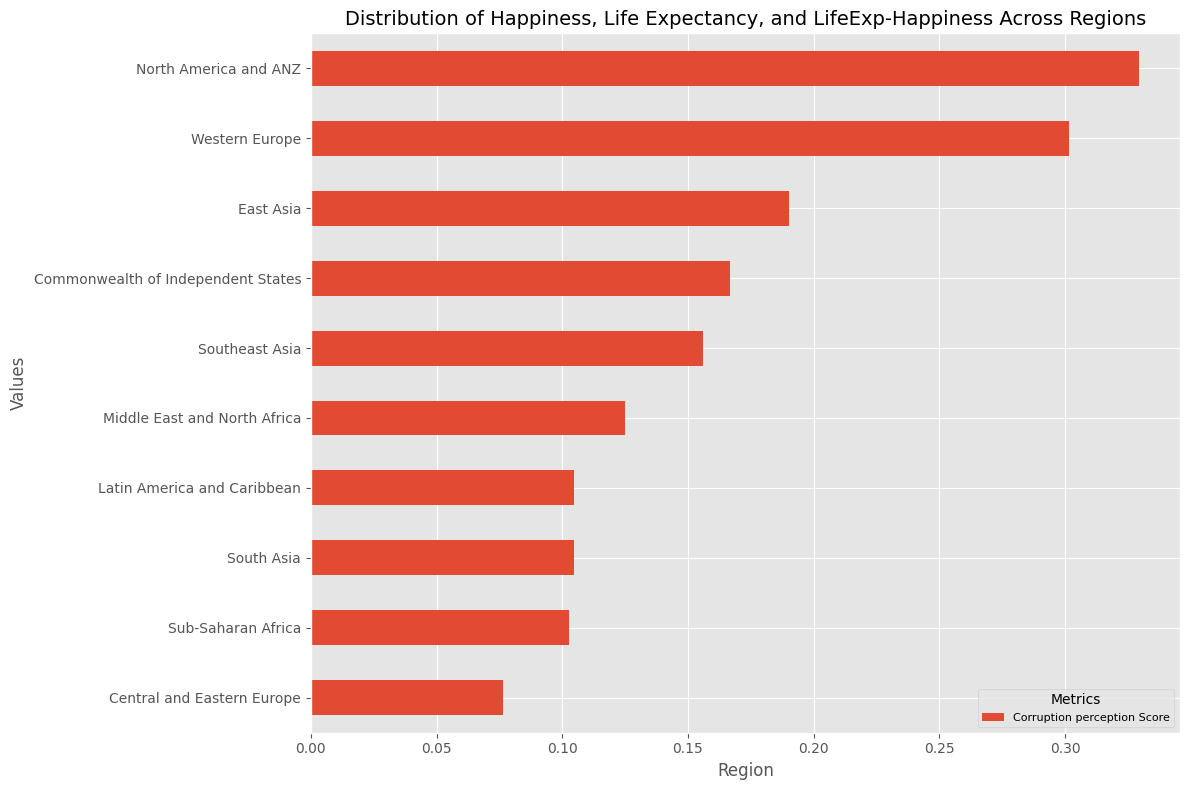

In [ ]:

plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
Region_by_corruption_perception.plot(kind = 'barh', label="Corruption perception Score")
plt.xlabel("Region")
plt.ylabel("Values")
plt.title("Distribution of Happiness, Life Expectancy, and LifeExp-Happiness Across Regions", fontsize=14)
#plt.xticks(rotation=45, ha='right')
plt.legend(title="Metrics", fontsize=8, loc='lower right')
plt.tight_layout()
plt.show()


Result was sorted to show the how regions perceive corruption in an ascending order. **Central and Eastern Europe** has the lowest `perceptions_of_corruption`score of **0.076227**. While **North America and ANZ** has the highest `perceptions_of_corruption` score of **0.329250**. This indicates that in **North America and ANZ** people maybe more aware of corrupt practices and have lower trust in the goverment and institution which is not so in other region.

#Number 7. Is there a link between generosity and happiness?

In [ ]:
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'lifeexp_happiness'],
      dtype='object')

In [ ]:
generosity_happiness_relationship = df[['happiness_score', 'generosity']].corr()
print(generosity_happiness_relationship)
generosity_happiness_relationship_coefficient = df['happiness_score'].corr(df['generosity'])
print(f"The correlation coefficient between happiness and generosity is: \tAnswer {generosity_happiness_relationship_coefficient}")

                 happiness_score  generosity
happiness_score          1.00000     0.04368
generosity               0.04368     1.00000
The correlation coefficient between happiness and generosity is: 	Answer 0.04367966404188958


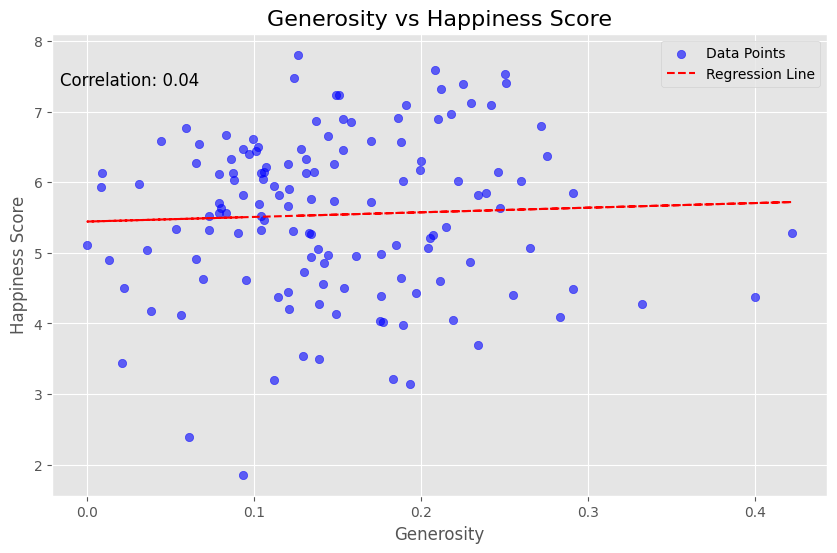

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['generosity'], df['happiness_score'], color='blue', alpha=0.6, label='Data Points')

# Fit a regression line (simple linear regression) and plot it
# Fit a line using np.polyfit (degree 1 for linear fit)
slope, intercept = np.polyfit(df['generosity'], df['happiness_score'], 1)
plt.plot(df['generosity'], slope * df['generosity'] + intercept, color='red', linestyle='--', label='Regression Line')

# Add labels and title
plt.title("Generosity vs Happiness Score", fontsize=16)
plt.xlabel("Generosity", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)

# Display the correlation value on the plot
plt.text(0.1, 0.9, f"Correlation: {generosity_happiness_relationship_coefficient:.2f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.legend()
plt.show()

The correlation coefficient of **0.04** indicates a very weak link between `generosity` and `happiness`. This is clearly seen in the regression line. This shows that generosity is not a function of happiness. And a great well being does not implies that the people will be givers

##Number 8. How does the freedom to make life choices relate to happiness?

In [ ]:
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'lifeexp_happiness'],
      dtype='object')

In [ ]:
freedom_happiness_corr = df[['freedom_to_make_life_choices', 'happiness_score']].corr()
print(f'Here is the correlation coefficient chart between happiness score and freedom_to_make_life_choice: \n{freedom_happiness_corr}')
freedom_of_choice_happiness_relationship_coefficient = df['freedom_to_make_life_choices'].corr(df['happiness_score'])
print(f'\nThe correlation coefficient is \t\tAnswer: {freedom_of_choice_happiness_relationship_coefficient}')

Here is the correlation coefficient chart between happiness score and freedom_to_make_life_choice: 
                              freedom_to_make_life_choices  happiness_score
freedom_to_make_life_choices                      1.000000         0.662909
happiness_score                                   0.662909         1.000000

The correlation coefficient is 		Answer: 0.6629085213455271


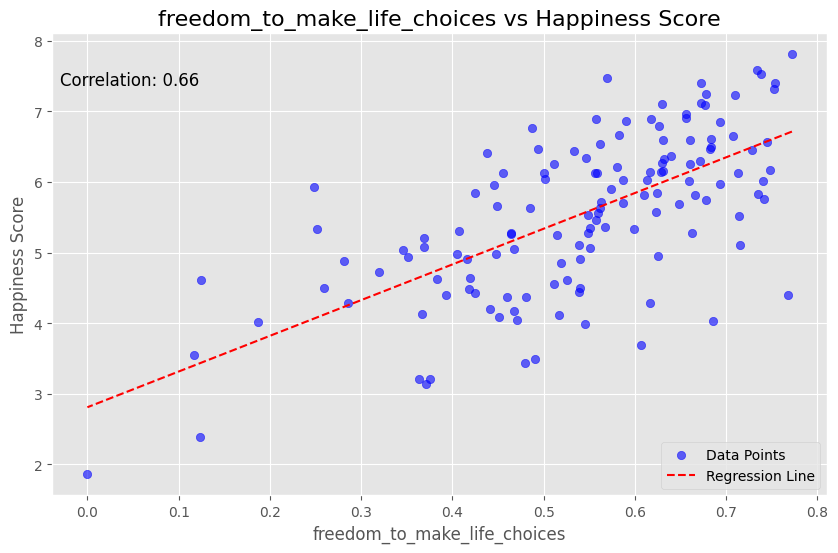

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['freedom_to_make_life_choices'], df['happiness_score'], color='blue', alpha=0.6, label='Data Points')

# Fit a regression line (simple linear regression) and plot it
# Fit a line using np.polyfit (degree 1 for linear fit)
slope, intercept = np.polyfit(df['freedom_to_make_life_choices'], df['happiness_score'], 1)
plt.plot(df['freedom_to_make_life_choices'], slope * df['freedom_to_make_life_choices'] + intercept, color='red', linestyle='--', label='Regression Line')

# Add labels and title
plt.title("freedom_to_make_life_choices vs Happiness Score", fontsize=16)
plt.xlabel("freedom_to_make_life_choices", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)

# Display the correlation value on the plot
plt.text(0.1, 0.9, f"Correlation: {freedom_of_choice_happiness_relationship_coefficient:.2f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.legend(loc = 'lower right')
plt.show()

A correlation coefficient of **0.66** indicates that there is a strong relationship between `happiness_score` and `freedom_to_make_life_choices` to make decision by the people. This shows that when people have `freedom_to_make_life_choices` they are happier.Hence, an increased `happiness_score`

#Number 9. What are the averages for each metric across regions?

In [ ]:
# Select specific metrics and calculate their averages
averages_metric_across_region = df.groupby('region')[['happiness_score', 'gdp_per_capita', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']].mean()
averages_metric_across_region


,happiness_score,gdp_per_capita,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
region,,,,,,
Central and Eastern Europe,5.967091,1.618364,0.430545,0.566227,0.137273,0.076227
Commonwealth of Independent States,5.828250,1.231000,0.368000,0.675500,0.183500,0.166750
East Asia,5.930167,1.734667,0.521833,0.510333,0.110833,0.190167
Latin America and Caribbean,5.966053,1.349632,0.412158,0.605895,0.109158,0.104632
Middle East and North Africa,5.102143,1.514571,0.401155,0.433929,0.099286,0.124786
North America and ANZ,7.018250,1.900500,0.494000,0.640500,0.225000,0.329250
South Asia,4.089000,1.069833,0.259833,0.486500,0.147167,0.104500
Southeast Asia,5.431222,1.400889,0.360333,0.667111,0.233778,0.156000
Sub-Saharan Africa,4.382485,0.912848,0.148788,0.428394,0.164727,0.102697


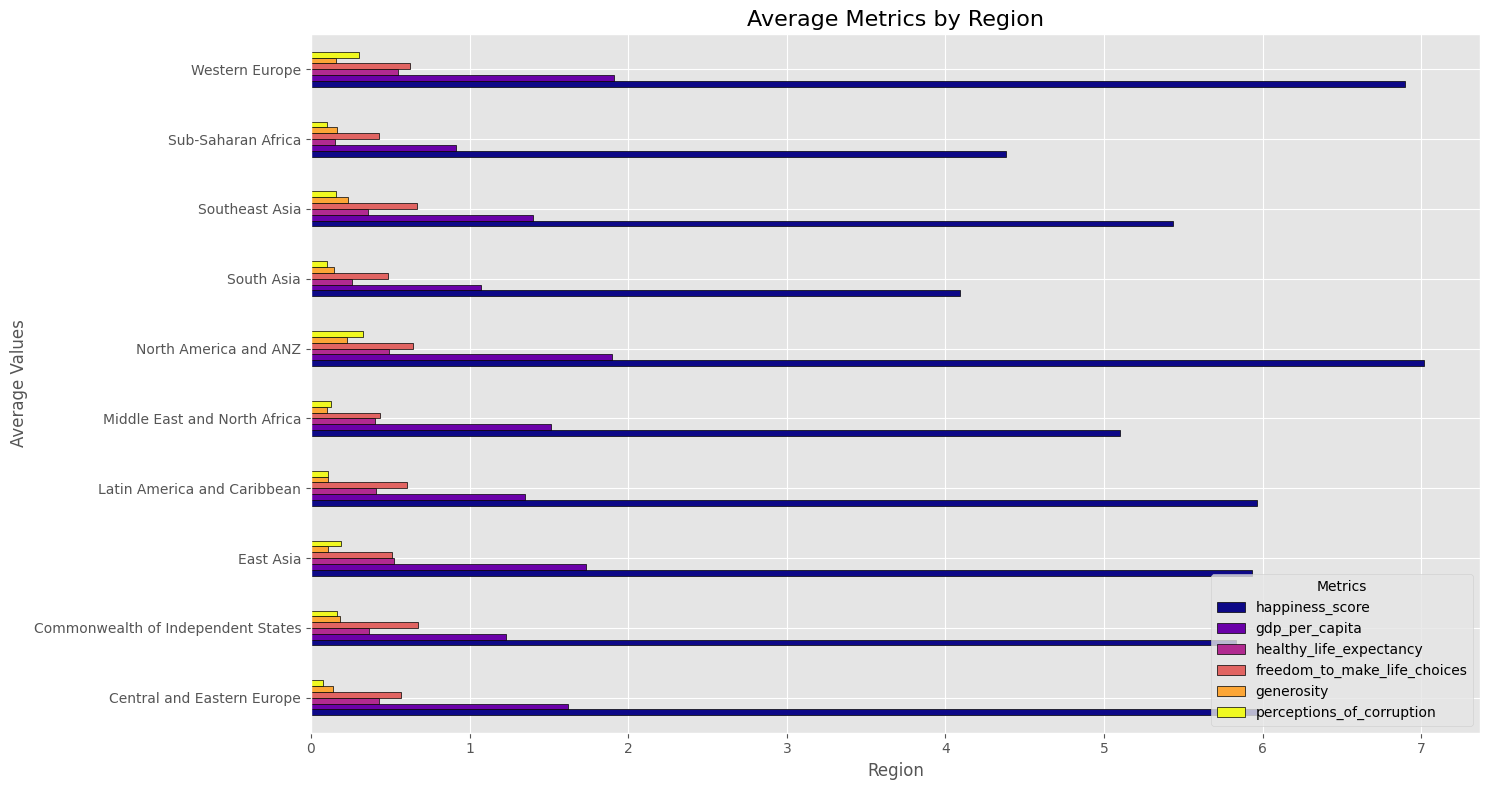

In [ ]:
#Visualize the average metrics
plt.style.use('ggplot')
averages_metric_across_region.plot(kind='barh', figsize=(15, 8), colormap='plasma', edgecolor='black')

plt.title("Average Metrics by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Values", fontsize=12)
plt.xticks(fontsize=10)
plt.legend(title="Metrics", fontsize=10, loc = 'lower right')
plt.tight_layout()
plt.show()


#Number 10. Which countries deviate the most from the regional average happiness score?

In [ ]:
#The average happiness scored has earlier been defined as Happiness_per_region
#Create a new column for it
df['Avg_happiness_score_region'] = df['region'].map(Happiness_per_region)

# Calculate deviation from the regional average by substrating the avg_happiness_score_region from happiness_score
df['deviation_from_avg_happiness_score'] = df['happiness_score'] - df['Avg_happiness_score_region']

# Find countries with the highest absolute deviation
top_deviations = df.loc[df['deviation_from_avg_happiness_score'].abs().nlargest(10).index].sort_values(by='deviation_from_avg_happiness_score')
print('The countries with the most deviations are:')
print(top_deviations[['country', 'region', 'happiness_score', 'Avg_happiness_score_region', 'deviation_from_avg_happiness_score']])



The countries with the most deviations are:
                  country                        region  happiness_score  \
135               Lebanon  Middle East and North Africa            2.392   
136           Afghanistan                    South Asia            1.859   
134          Sierra Leone            Sub-Saharan Africa            3.138   
133              Zimbabwe            Sub-Saharan Africa            3.204   
132      Congo (Kinshasa)            Sub-Saharan Africa            3.207   
77                  Nepal                    South Asia            5.360   
29           Saudi Arabia  Middle East and North Africa            6.463   
25   United Arab Emirates  Middle East and North Africa            6.571   
58              Mauritius            Sub-Saharan Africa            5.902   
3                  Israel  Middle East and North Africa            7.473   

     Avg_happiness_score_region  deviation_from_avg_happiness_score  
135                    5.102143                  

In [ ]:

top_ten_deviations = top_deviations[['country', 'region', 'happiness_score', 'Avg_happiness_score_region', 'deviation_from_avg_happiness_score']]
top_ten_deviations

,country,region,happiness_score,Avg_happiness_score_region,deviation_from_avg_happiness_score
135,Lebanon,Middle East and North Africa,2.392,5.102143,-2.710143
136,Afghanistan,South Asia,1.859,4.089000,-2.230000
134,Sierra Leone,Sub-Saharan Africa,3.138,4.382485,-1.244485
133,Zimbabwe,Sub-Saharan Africa,3.204,4.382485,-1.178485
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,4.382485,-1.175485
77,Nepal,South Asia,5.360,4.089000,1.271000
29,Saudi Arabia,Middle East and North Africa,6.463,5.102143,1.360857
25,United Arab Emirates,Middle East and North Africa,6.571,5.102143,1.468857
58,Mauritius,Sub-Saharan Africa,5.902,4.382485,1.519515
3,Israel,Middle East and North Africa,7.473,5.102143,2.370857


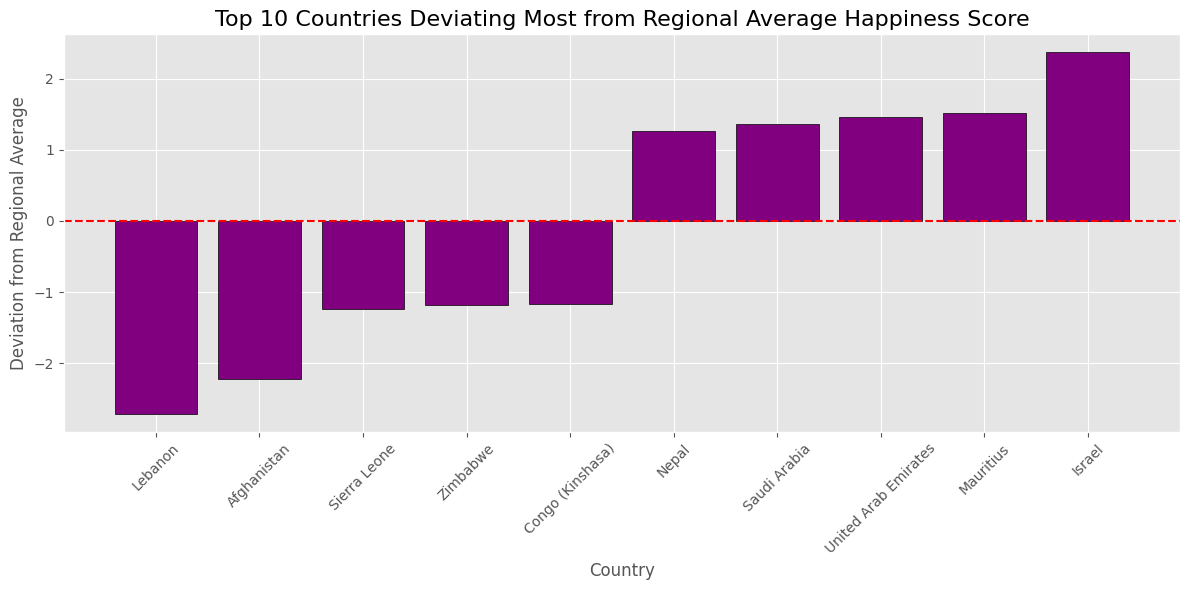

In [ ]:
# Visualizing the deviaitions
plt.figure(figsize=(12, 6))
plt.bar(top_ten_deviations['country'], top_deviations['deviation_from_avg_happiness_score'], color='purple', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
plt.title('Top 10 Countries Deviating Most from Regional Average Happiness Score', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Deviation from Regional Average', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
print('These are the countries with the most deviations from the average happiness score:')
for country in top_ten_deviations['country']:
  print(country)

These are the countries with the most deviations from the average happiness score:
Lebanon
Afghanistan
Sierra Leone
Zimbabwe
Congo (Kinshasa)
Nepal
Saudi Arabia
United Arab Emirates
Mauritius
Israel


# WE WILL BE BUILING A MODEL USING LINEAR REGRESSION TO PREDICT HAPPINESS_SCORES
1. Perform exploratory data analysis
2. Check out the correlation coefficient of the target `happiness score` with other metrics to examine the features predictive power.
3. Split the dataset into `train_set` and `test_set`
4. Build the model and train it with the `train_set`
5. Test the model with the `test_set`

In the earlier part of the work, we've examine the structure of the dataset and added some new features such as `lifeexp_happiness`, `Avg_happiness_score_region` and `deviation_from_avg_happiness_score` and the missing data has been handled.

**A quick overview of the dataset**

In [ ]:
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'lifeexp_happiness',
       'Avg_happiness_score_region', 'deviation_from_avg_happiness_score'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
country,0
region,0
happiness_score,0
gdp_per_capita,0
social_support,0
healthy_life_expectancy,0
freedom_to_make_life_choices,0
generosity,0
perceptions_of_corruption,0
lifeexp_happiness,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   country                             137 non-null    object 
 1   region                              137 non-null    object 
 2   happiness_score                     137 non-null    float64
 3   gdp_per_capita                      137 non-null    float64
 4   social_support                      137 non-null    float64
 5   healthy_life_expectancy             137 non-null    float64
 6   freedom_to_make_life_choices        137 non-null    float64
 7   generosity                          137 non-null    float64
 8   perceptions_of_corruption           137 non-null    float64
 9   lifeexp_happiness                   137 non-null    float64
 10  Avg_happiness_score_region          137 non-null    float64
 11  deviation_from_avg_happiness_score  137 non-n

In [ ]:
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,lifeexp_happiness,Avg_happiness_score_region,deviation_from_avg_happiness_score
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,5.539796,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898,2.160304,5.539796,-3.111866e-16
std,1.139929,0.432963,0.326322,0.156114,0.149501,0.076053,0.126723,1.171286,0.914634,6.803548e-01
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.089000,-2.710143e+00
25%,4.724000,1.099000,0.962000,0.250000,0.455000,0.097000,0.060000,1.121505,4.382485,-3.634848e-01
50%,5.684000,1.449000,1.227000,0.389000,0.557000,0.137000,0.111000,2.249296,5.930167,4.951515e-02
75%,6.334000,1.798000,1.401000,0.486000,0.656000,0.199000,0.187000,3.053368,5.967091,4.009091e-01
max,7.804000,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,4.311921,7.018250,2.370857e+00


#**PREPROCESSING**

**Encode region**

In [ ]:
region_mapped = {'North America and ANZ': 1, 'Western Europe': 2, 'Central and Eastern Europe': 3, 'Latin America and Caribbean': 4,
 'East Asia': 5, 'Commonwealth of Independent States': 6,'Southeast Asia': 7,'Middle East and North Africa': 8,'Sub-Saharan Africa': 9,'South Asia': 10}
df['region_mapped'] = df['region'].map(region_mapped)

In [ ]:
df.head(2)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,lifeexp_happiness,Avg_happiness_score_region,deviation_from_avg_happiness_score,region_mapped
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,4.175140,6.89435,0.90965,2
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,4.073682,6.89435,0.69165,2


**Check out the distribution of values of the numerics in the dataframe**

Here is the Distribution of the numerical features in the dataset


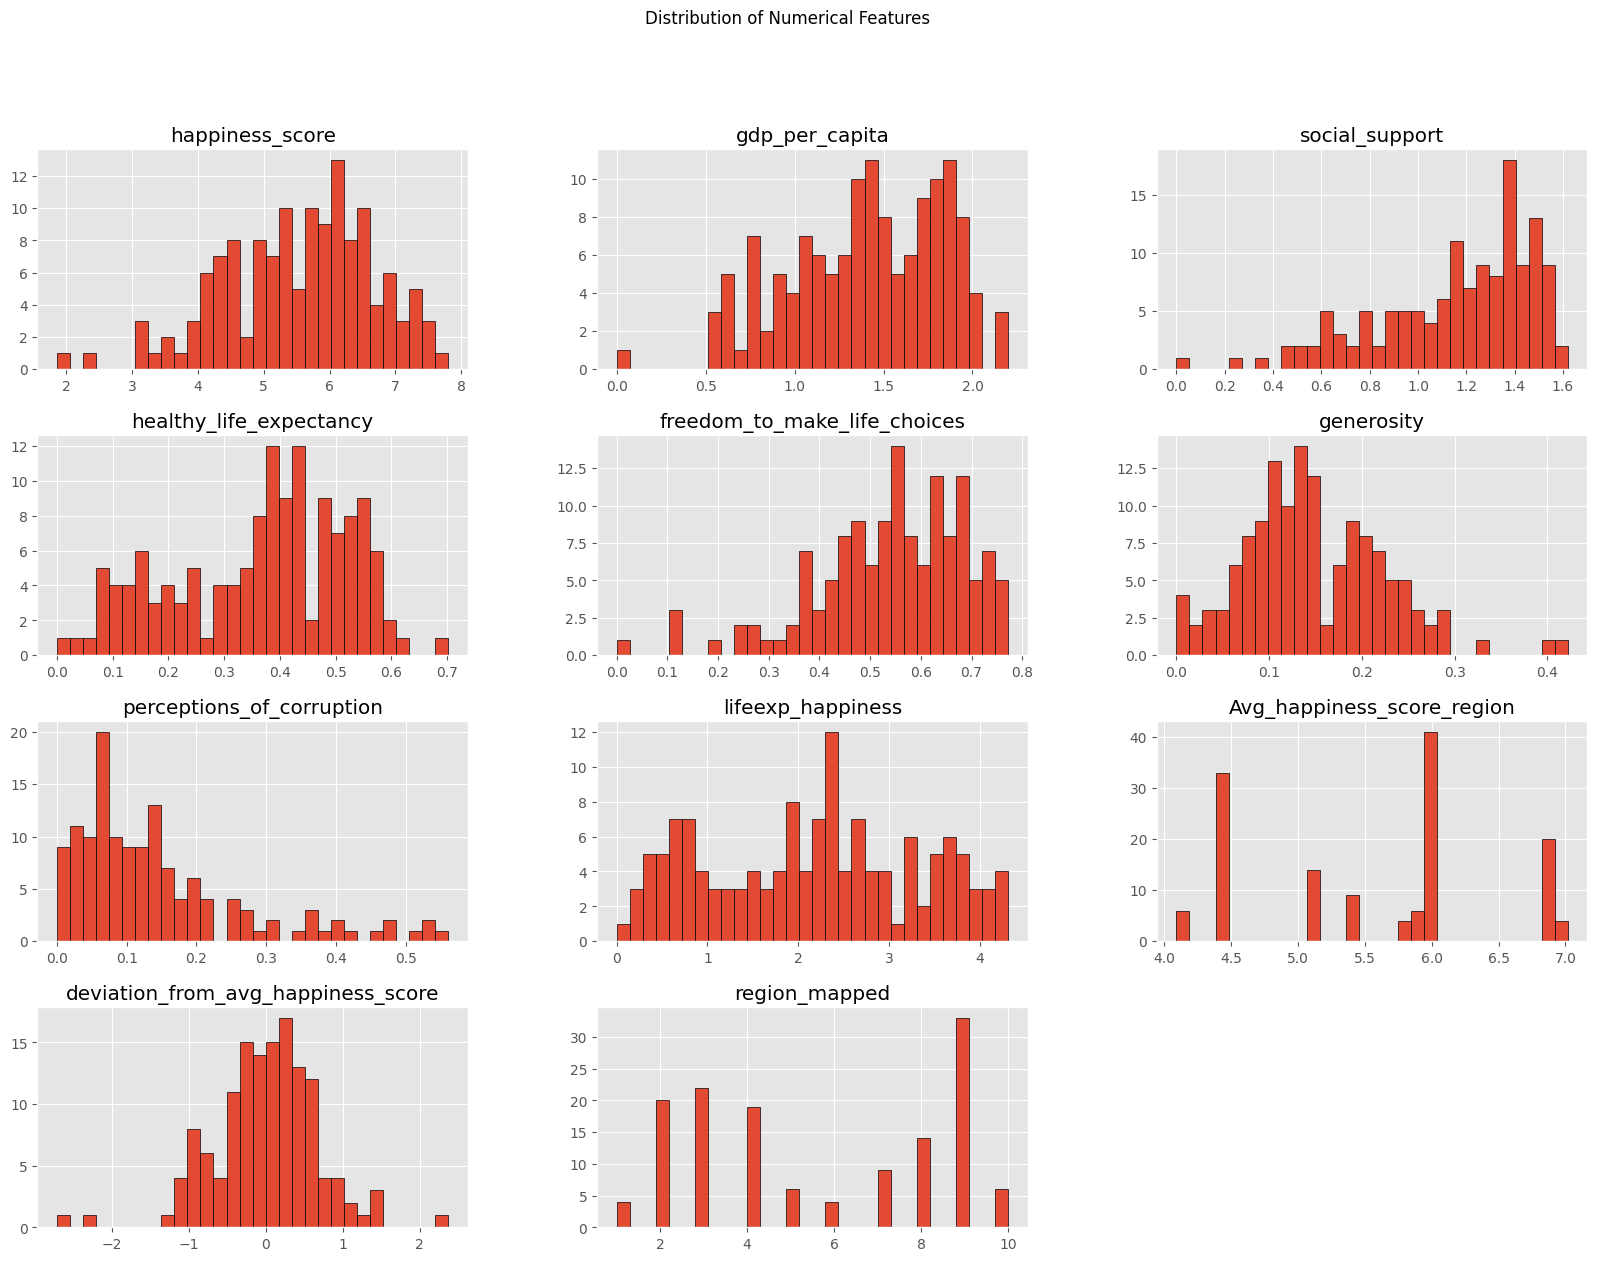

In [ ]:
print('Here is the Distribution of the numerical features in the dataset')
df.hist(figsize=(20, 14), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

**Check out the distribution of values of the categorical variable (region) in the dataframe**

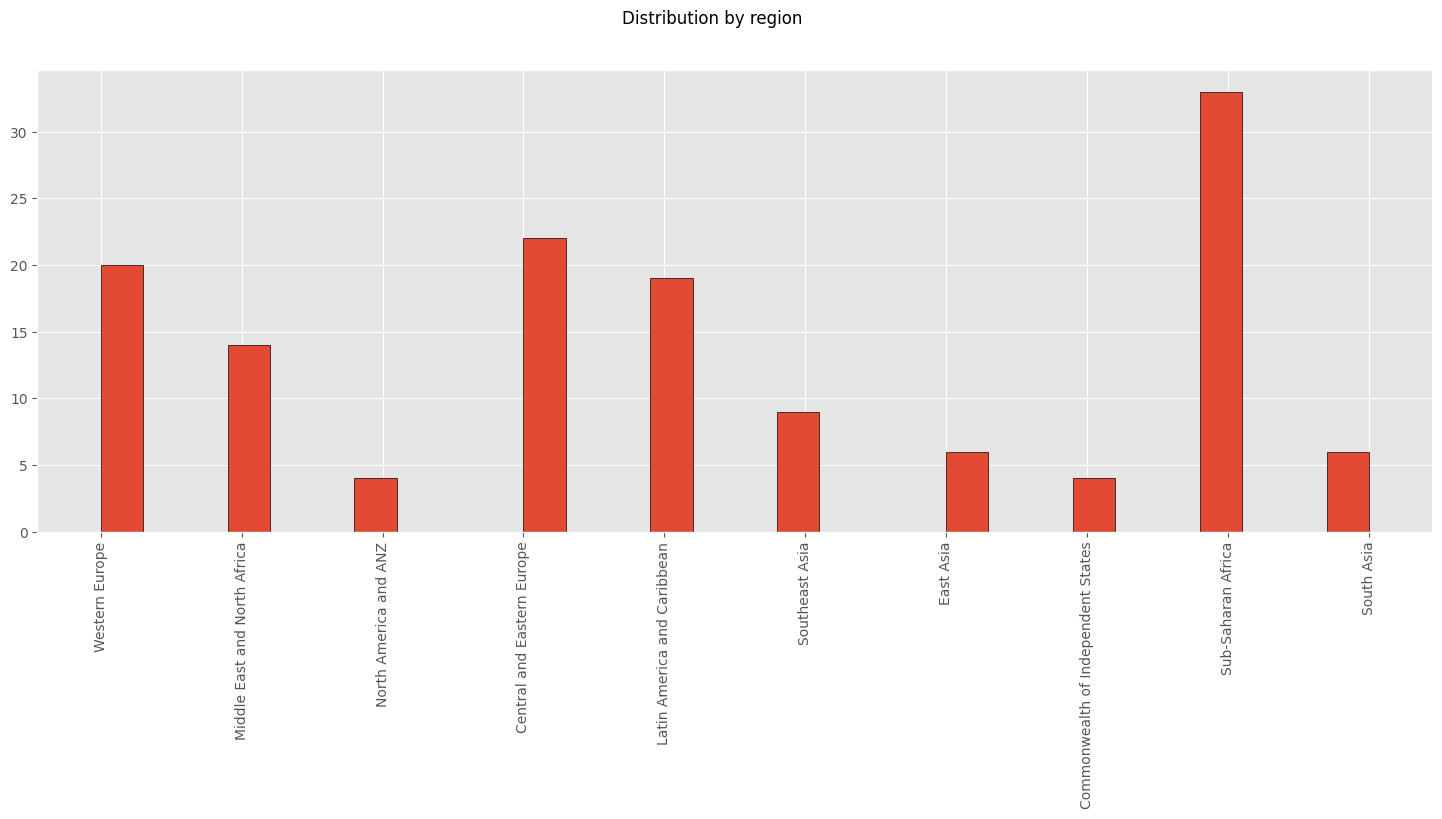

In [ ]:
#Visual region which alongside countries are the categorical variables
df['region'].hist(figsize=(18, 6), bins=30, edgecolor='black')
plt.suptitle('Distribution by region')
plt.xticks(rotation = 90)
plt.show()



**Check out the correlation coefficient to understand the features relationship with the target using scatter plots**

Here is the correlation coefficient chart between happiness score and freedom_to_make_life_choice: 
                              freedom_to_make_life_choices  happiness_score
freedom_to_make_life_choices                      1.000000         0.662909
happiness_score                                   0.662909         1.000000

 		Answer: 0.6629085213455271




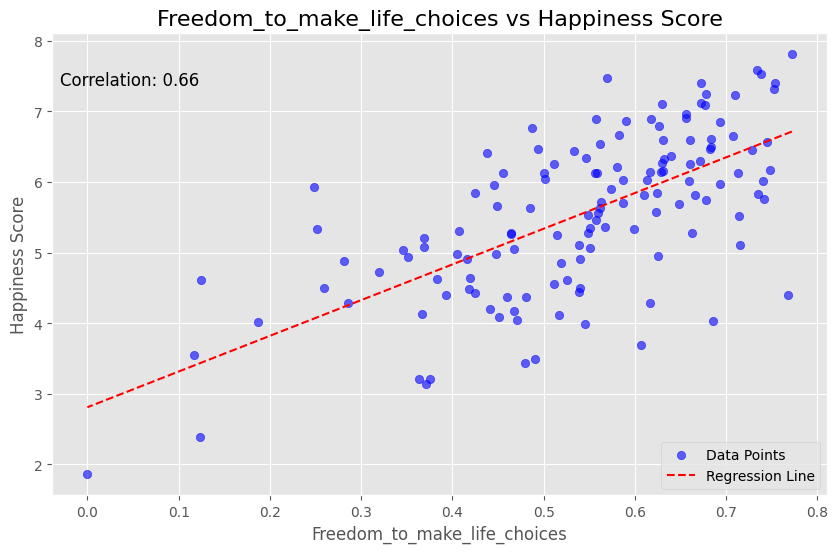

In [ ]:
#Freedom to make life choice vs Happiness score
freedom_happiness_corr = df[['freedom_to_make_life_choices', 'happiness_score']].corr()
print(f'Here is the correlation coefficient chart between happiness score and freedom_to_make_life_choice: \n{freedom_happiness_corr}')
freedom_of_choice_happiness_relationship_coefficient = df['freedom_to_make_life_choices'].corr(df['happiness_score'])
print(f'\n \t\tAnswer: {freedom_of_choice_happiness_relationship_coefficient}')
print('\n')

plt.figure(figsize=(10, 6))
plt.scatter(df['freedom_to_make_life_choices'], df['happiness_score'], color='blue', alpha=0.6, label='Data Points')
slope, intercept = np.polyfit(df['freedom_to_make_life_choices'], df['happiness_score'], 1)
plt.plot(df['freedom_to_make_life_choices'], slope * df['freedom_to_make_life_choices'] + intercept, color='red', linestyle='--', label='Regression Line')
plt.title("Freedom_to_make_life_choices vs Happiness Score", fontsize=16)
plt.xlabel("Freedom_to_make_life_choices", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.text(0.1, 0.9, f"Correlation: {freedom_of_choice_happiness_relationship_coefficient:.2f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.legend(loc = 'lower right')
plt.show()


Here is the correlation coefficient chart between happiness score and social_support: 
                 social_support  happiness_score
social_support         1.000000         0.834604
happiness_score        0.834604         1.000000

 		Answer: 0.8346044795265051


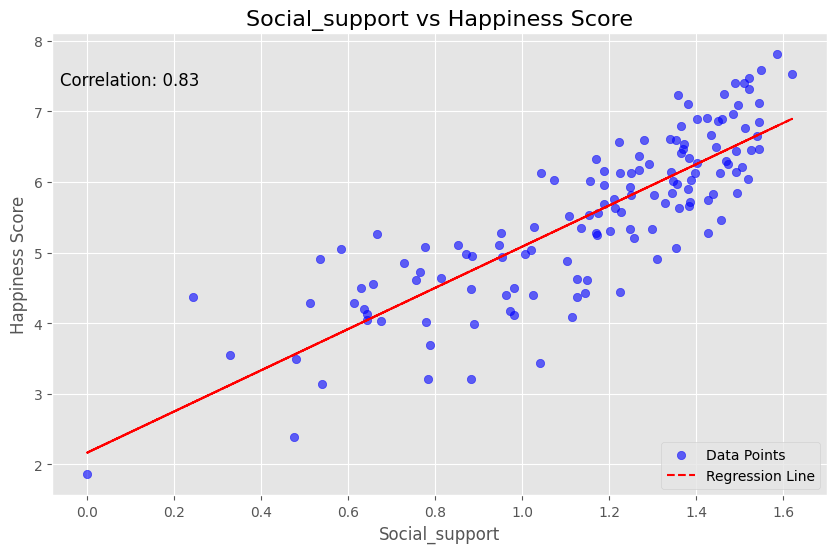

In [ ]:
#Social support and happiness score
social_support_happiness_corr = df[['social_support', 'happiness_score']].corr()
print(f'Here is the correlation coefficient chart between happiness score and social_support: \n{social_support_happiness_corr}')
social_support_happiness_relationship_coefficient = df['social_support'].corr(df['happiness_score'])
print(f'\n \t\tAnswer: {social_support_happiness_relationship_coefficient}')

plt.figure(figsize=(10, 6))
plt.scatter(df['social_support'], df['happiness_score'], color='blue', alpha=0.6, label='Data Points')
slope, intercept = np.polyfit(df['social_support'], df['happiness_score'], 1)
plt.plot(df['social_support'], slope * df['social_support'] + intercept, color='red', linestyle='--', label='Regression Line')
plt.title("Social_support vs Happiness Score", fontsize=16)
plt.xlabel("Social_support", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.text(0.1, 0.9, f"Correlation: {social_support_happiness_relationship_coefficient:.2f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.legend(loc = 'lower right')
plt.show()

Here is the correlation coefficient chart between happiness score and perceptions_of_corruption: 
                           perceptions_of_corruption  happiness_score
perceptions_of_corruption                   1.000000         0.471913
happiness_score                             0.471913         1.000000

		Answer: 0.4719134705539265




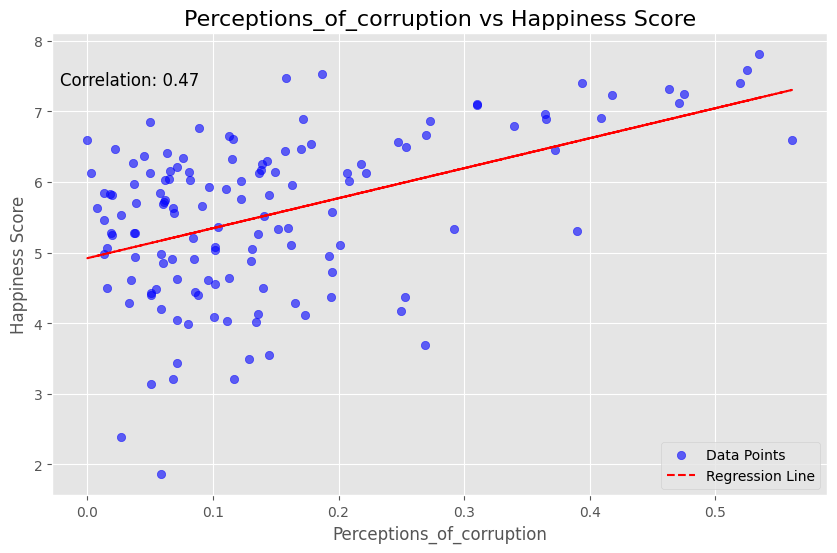

In [ ]:
#Perception of corruption and happiness score
perceptions_of_corruption_happiness_corr = df[['perceptions_of_corruption', 'happiness_score']].corr()
print(f'Here is the correlation coefficient chart between happiness score and perceptions_of_corruption: \n{perceptions_of_corruption_happiness_corr}')
perceptions_of_corruption_happiness_relationship_coefficient = df['perceptions_of_corruption'].corr(df['happiness_score'])
print(f'\n\t\tAnswer: {perceptions_of_corruption_happiness_relationship_coefficient}')
print('\n')


plt.figure(figsize=(10, 6))
plt.scatter(df['perceptions_of_corruption'], df['happiness_score'], color='blue', alpha=0.6, label='Data Points')
slope, intercept = np.polyfit(df['perceptions_of_corruption'], df['happiness_score'], 1)
plt.plot(df['perceptions_of_corruption'], slope * df['perceptions_of_corruption'] + intercept, color='red', linestyle='--', label='Regression Line')
plt.title("Perceptions_of_corruption vs Happiness Score", fontsize=16)
plt.xlabel("Perceptions_of_corruption", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.text(0.1, 0.9, f"Correlation: {perceptions_of_corruption_happiness_relationship_coefficient:.2f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.legend(loc = 'lower right')
plt.show()

Here is the correlation coefficient chart between happiness score and healthy_life_expectancy: 
                         healthy_life_expectancy  happiness_score
healthy_life_expectancy                 1.000000         0.745849
happiness_score                         0.745849         1.000000

 		Answer: 0.7458493176549954




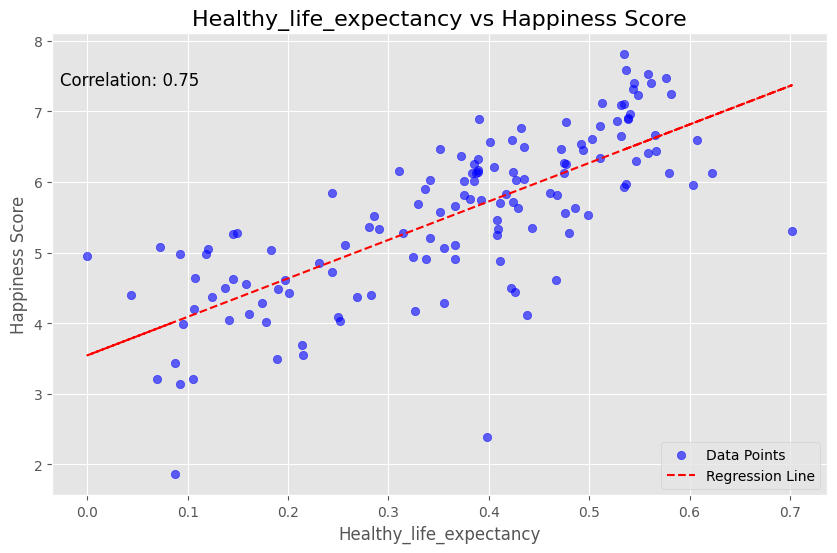

In [ ]:
#healthy_life_expectancy and happiness_score
healthy_life_expectancy_happiness_corr = df[['healthy_life_expectancy', 'happiness_score']].corr()
print(f'Here is the correlation coefficient chart between happiness score and healthy_life_expectancy: \n{healthy_life_expectancy_happiness_corr}')
healthy_life_expectancy_happiness_relationship_coefficient = df['healthy_life_expectancy'].corr(df['happiness_score'])
print(f'\n \t\tAnswer: {healthy_life_expectancy_happiness_relationship_coefficient}')
print('\n')

plt.figure(figsize=(10, 6))
plt.scatter(df['healthy_life_expectancy'], df['happiness_score'], color='blue', alpha=0.6, label='Data Points')
slope, intercept = np.polyfit(df['healthy_life_expectancy'], df['happiness_score'], 1)
plt.plot(df['healthy_life_expectancy'], slope * df['healthy_life_expectancy'] + intercept, color='red', linestyle='--', label='Regression Line')
plt.title("Healthy_life_expectancy vs Happiness Score", fontsize=16)
plt.xlabel("Healthy_life_expectancy", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.text(0.1, 0.9, f"Correlation: {healthy_life_expectancy_happiness_relationship_coefficient:.2f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.legend(loc = 'lower right')
plt.show()


Here is the correlation coefficient chart between happiness score and generosity: 
                 generosity  happiness_score
generosity          1.00000          0.04368
happiness_score     0.04368          1.00000

 		Answer: 0.04367966404188958




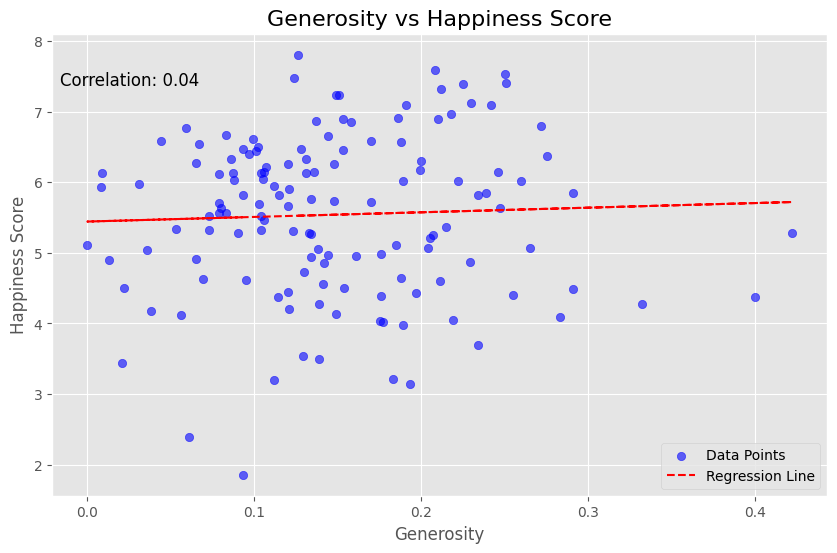

In [ ]:
#Generosity and happiness_score
generosity_happiness_corr = df[['generosity', 'happiness_score']].corr()
print(f'Here is the correlation coefficient chart between happiness score and generosity: \n{generosity_happiness_corr}')
generosity_happiness_relationship_coefficient = df['generosity'].corr(df['happiness_score'])
print(f'\n \t\tAnswer: {generosity_happiness_relationship_coefficient}')
print('\n')

plt.figure(figsize=(10, 6))
plt.scatter(df['generosity'], df['happiness_score'], color='blue', alpha=0.6, label='Data Points')
slope, intercept = np.polyfit(df['generosity'], df['happiness_score'], 1)
plt.plot(df['generosity'], slope * df['generosity'] + intercept, color='red', linestyle='--', label='Regression Line')
plt.title("Generosity vs Happiness Score", fontsize=16)
plt.xlabel("Generosity", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.text(0.1, 0.9, f"Correlation: {generosity_happiness_relationship_coefficient:.2f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.legend(loc = 'lower right')
plt.show()

Here is the correlation coefficient chart between happiness score and gdp_per_capita: 
                 gdp_per_capita  happiness_score
gdp_per_capita         1.000000         0.784342
happiness_score        0.784342         1.000000

 		Answer: 0.7843421846477893




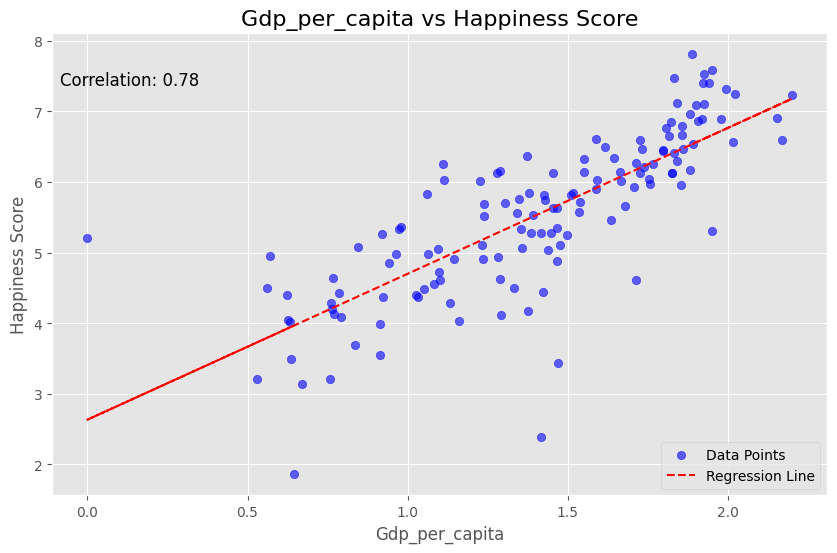

In [ ]:
#gdp_per_capital and happiness score
gdp_per_capita_happiness_corr = df[['gdp_per_capita', 'happiness_score']].corr()
print(f'Here is the correlation coefficient chart between happiness score and gdp_per_capita: \n{gdp_per_capita_happiness_corr}')
gdp_per_capita_happiness_relationship_coefficient = df['gdp_per_capita'].corr(df['happiness_score'])
print(f'\n \t\tAnswer: {gdp_per_capita_happiness_relationship_coefficient}')
print('\n')

plt.figure(figsize=(10, 6))
plt.scatter(df['gdp_per_capita'], df['happiness_score'], color='blue', alpha=0.6, label='Data Points')
slope, intercept = np.polyfit(df['gdp_per_capita'], df['happiness_score'], 1)
plt.plot(df['gdp_per_capita'], slope * df['gdp_per_capita'] + intercept, color='red', linestyle='--', label='Regression Line')
plt.title("Gdp_per_capita vs Happiness Score", fontsize=16)
plt.xlabel("Gdp_per_capita", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.text(0.1, 0.9, f"Correlation: {gdp_per_capita_happiness_relationship_coefficient:.2f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.legend(loc = 'lower right')
plt.show()



In [ ]:
#check out the features correlations with one another
features = ["freedom_to_make_life_choices", "generosity", "healthy_life_expectancy", "perceptions_of_corruption", "gdp_per_capita", "social_support"]
print('The correlation matrix for the feature is:\n')
correlation_matrix = df[features].corr(numeric_only = True)
correlation_matrix

The correlation matrix for the feature is:



,freedom_to_make_life_choices,generosity,healthy_life_expectancy,perceptions_of_corruption,gdp_per_capita,social_support
freedom_to_make_life_choices,1.000000,0.169685,0.413907,0.383672,0.451405,0.541832
generosity,0.169685,1.000000,-0.134916,0.121712,-0.156780,0.035736
healthy_life_expectancy,0.413907,-0.134916,1.000000,0.403836,0.836373,0.724745
perceptions_of_corruption,0.383672,0.121712,0.403836,1.000000,0.436979,0.272538
gdp_per_capita,0.451405,-0.156780,0.836373,0.436979,1.000000,0.737993
social_support,0.541832,0.035736,0.724745,0.272538,0.737993,1.000000


**Establish the features relationship via the correlation matrix**

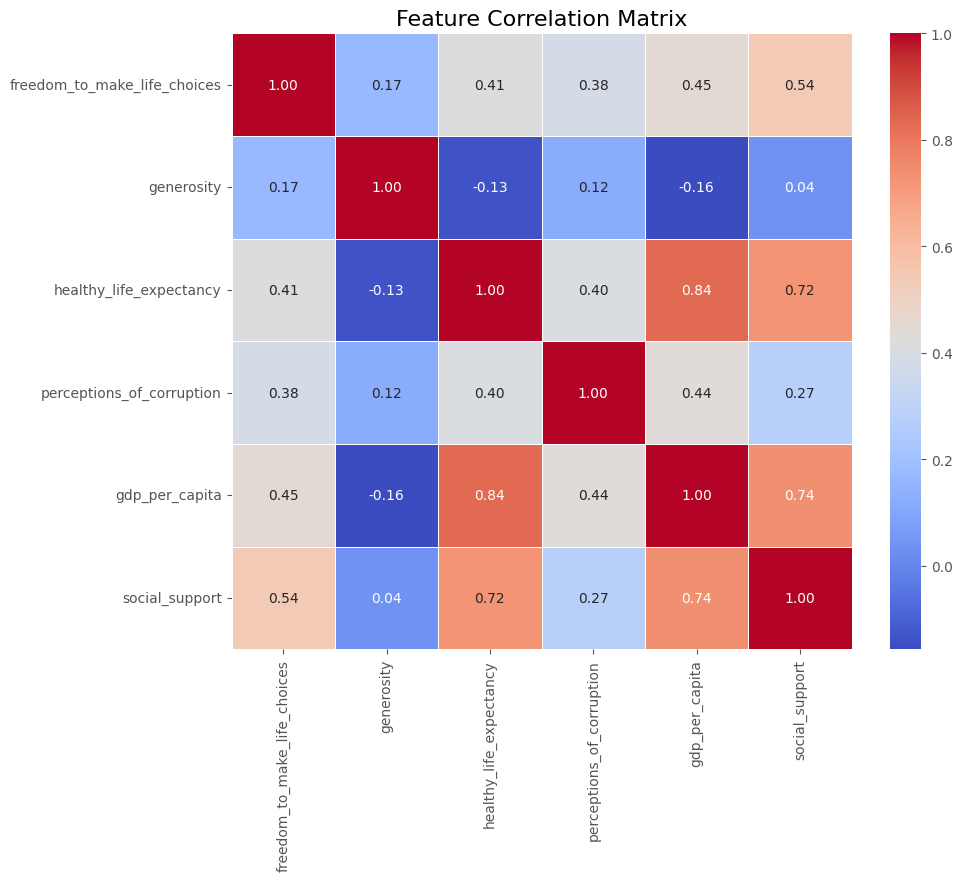

In [ ]:
# Visualize the correlation matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.show()


**Check the IVF to understand the features multicolinearity**

In [ ]:
X = df[features]
X = X.assign(Intercept=1)
vif_data = pd.DataFrame({"Feature": X.columns, "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]})

# Drop the intercept row
vif_data = vif_data[vif_data['Feature'] != 'Intercept']

print("The result for the Variance Inflation Factor (VIF):")
print(vif_data)


The result for the Variance Inflation Factor (VIF):
                        Feature       VIF
0  freedom_to_make_life_choices  1.589864
1                    generosity  1.187431
2       healthy_life_expectancy  3.727935
3     perceptions_of_corruption  1.428115
4                gdp_per_capita  4.200874
5                social_support  2.952920


The VIF are all lower than 5, indicating low to moderate multicollinearity.
`Gdp_per_capita`, `Healthy_life_expectancy`, `freedom_to_make_life_choices` and `social_support` all have strong correlation with the `happiness_score`. As such, they would be used as the features in the Linear regression model for predicting `happiness_score`

**In linear regression, scaling of features to be used in building model is essential. Thus, we will scale these features**

In [ ]:
scaler = StandardScaler()
df_features_model = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices']
df[df_features_model] = scaler.fit_transform(df[df_features_model])

**check the features for outliers**

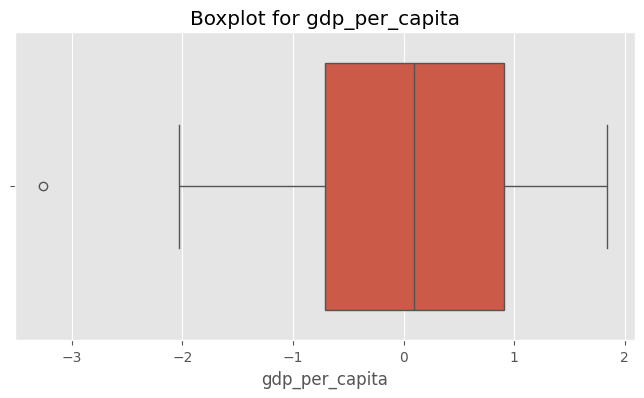

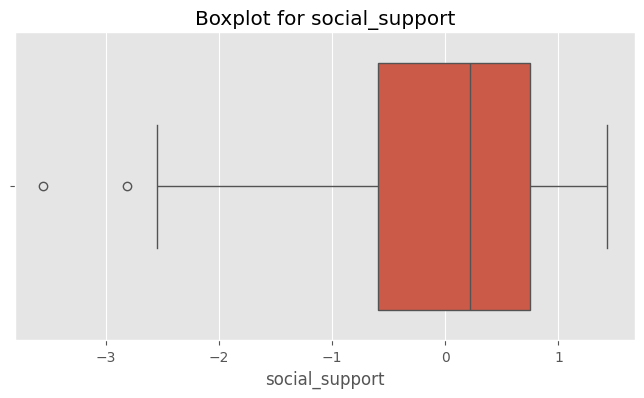

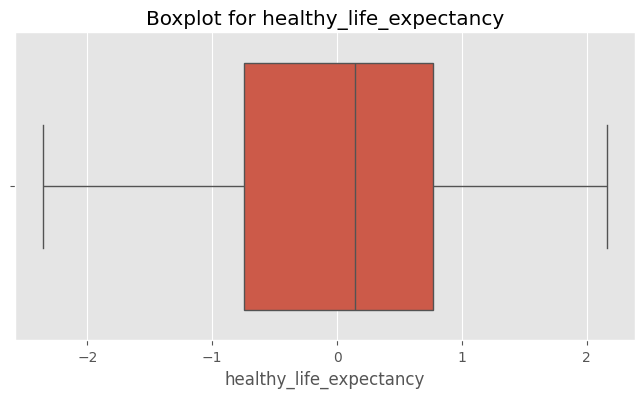

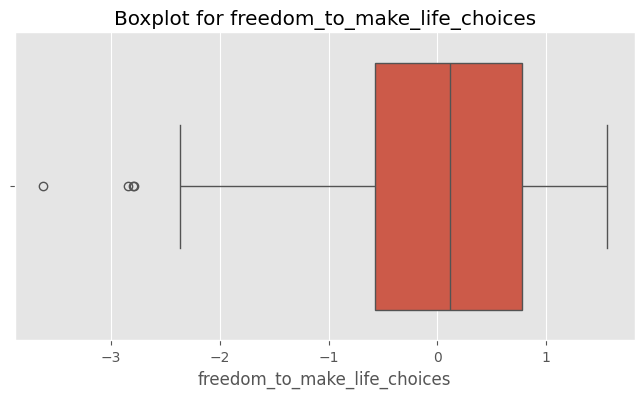

In [ ]:
for feature in df_features_model:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()


`gdp_per_capita`, `social_support` and `freedom_to_make_life_choices` all have outliers which may have an impact on the model. Hence, we will proceed to filtering them

In [ ]:
for feature in df_features_model:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows where the feature value is outside the bounds
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]


**Let's confirm for the present of outliers again**

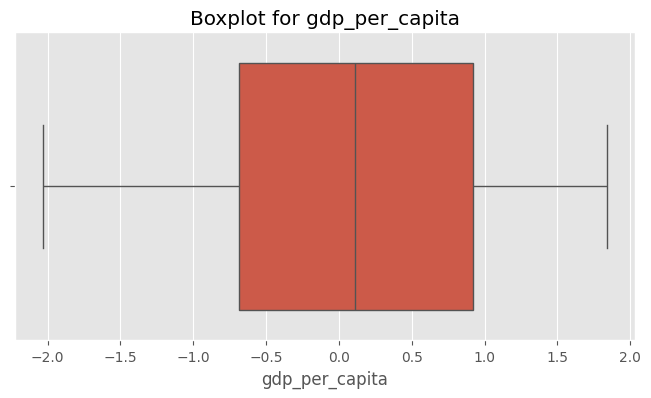

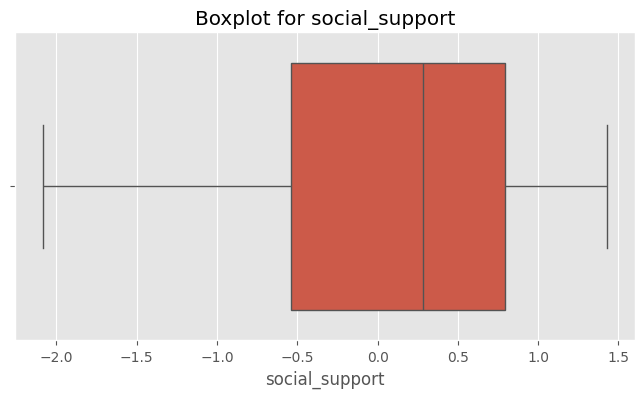

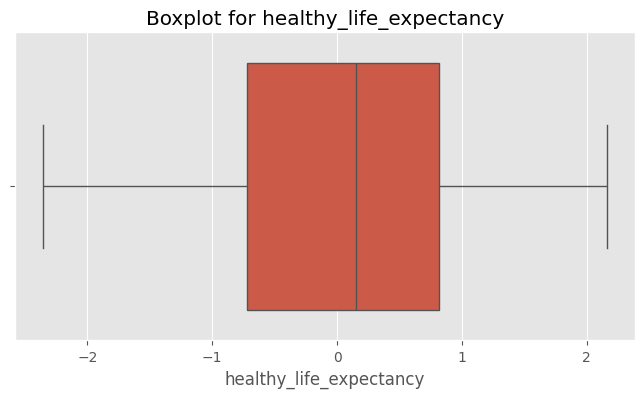

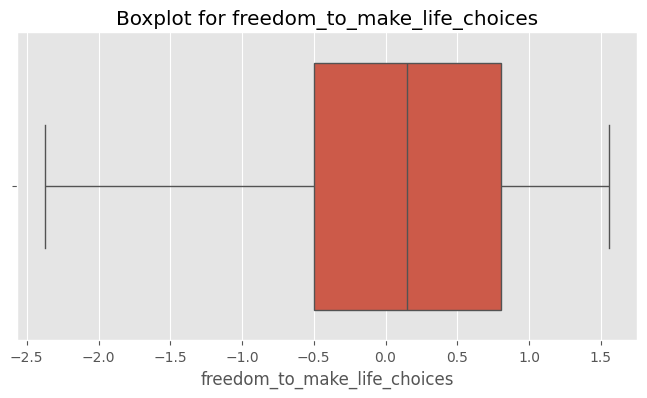

In [ ]:
for feature in df_features_model:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()


**The features that are correlated to the target are now free outliers**

#Training df selection

**Since we already know the feature with the best correlation factor to the happiness score, we will proceed to make these features alongside the target the training df**

In [ ]:
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'lifeexp_happiness',
       'Avg_happiness_score_region', 'deviation_from_avg_happiness_score',
       'region_mapped'],
      dtype='object')

In [ ]:
training_df = df[['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices']]

print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(20)

Read dataset completed successfully.
Total number of rows: 131




,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices
0,7.804,1.115061,1.318824,1.085381,1.557520
1,7.586,1.256468,1.205023,1.098239,1.302409
2,7.530,1.203150,1.426473,1.239679,1.329263
3,7.473,0.987563,1.121979,1.355402,0.194690
4,7.403,1.240241,1.020481,1.149671,0.886175
5,7.395,1.191560,1.088146,1.258966,1.436678
6,7.315,1.360784,1.121979,1.143242,1.423251
7,7.240,1.425692,0.943588,1.387547,0.926456
8,7.228,1.838322,0.617564,1.175388,1.141287
9,7.123,1.008426,1.192720,0.943941,0.886175


In [ ]:
training_df.shape

(131, 5)

**Define functions for visualizations**

In [ ]:
def make_plots(df, feature_names, label_name, model_output, sample_size=131):

  random_sample = df.sample(n=sample_size).copy()
  random_sample.reset_index()
  weights, bias, epochs, rmse = model_output

  is_2d_plot = len(feature_names) == 1
  model_plot_type = "scatter" if is_2d_plot else "surface"
  fig = make_subplots(rows=1, cols=2,
                      subplot_titles=("Loss Curve", "Model Plot"),
                      specs=[[{"type": "scatter"}, {"type": model_plot_type}]])

  plot_data(random_sample, feature_names, label_name, fig)
  plot_model(random_sample, feature_names, weights, bias, fig)
  plot_loss_curve(epochs, rmse, fig)

  fig.show()
  return

def plot_loss_curve(epochs, rmse, fig):
  curve = px.line(x=epochs, y=rmse)
  curve.update_traces(line_color='#ff0000', line_width=3)

  fig.append_trace(curve.data[0], row=1, col=1)
  fig.update_xaxes(title_text="Epoch", row=1, col=1)
  fig.update_yaxes(title_text="Root Mean Squared Error", row=1, col=1, range=[rmse.min()*0.8, rmse.max()])

  return

def plot_data(df, features, label, fig):
  if len(features) == 1:
    scatter = px.scatter(df, x=features[0], y=label)
  else:
    scatter = px.scatter_3d(df, x=features[0], y=features[1], z=label)

  fig.append_trace(scatter.data[0], row=1, col=2)
  if len(features) == 1:
    fig.update_xaxes(title_text=features[0], row=1, col=2)
    fig.update_yaxes(title_text=label, row=1, col=2)
  else:
    fig.update_layout(scene1=dict(xaxis_title=features[0], yaxis_title=features[1], zaxis_title=label))

  return

def plot_model(df, features, weights, bias, fig):
  df["PREDICTED_HAPPINESS_SCORE"] = bias[0]

  for index, feature in enumerate(features):
    df["PREDICTED_HAPPINESS_SCORE"] = df["PREDICTED_HAPPINESS_SCORE"] + weights[index][0] * df[feature]

  if len(features) == 1:
    model = px.line(df, x=features[0], y="PREDICTED_HAPPINESS_SCORE")
    model.update_traces(line_color='#ff0000', line_width=3)
  else:
    z_name, y_name = "PREDICTED_HAPPINESS_SCORE", features[1]
    z = [df[z_name].min(), (df[z_name].max() - df[z_name].min()) / 2, df[z_name].max()]
    y = [df[y_name].min(), (df[y_name].max() - df[y_name].min()) / 2, df[y_name].max()]
    x = []
    for i in range(len(y)):
      x.append((z[i] - weights[1][0] * y[i] - bias[0]) / weights[0][0])

    plane=pd.DataFrame({'x':x, 'y':y, 'z':[z] * 3})

    light_yellow = [[0, '#89CFF0'], [1, '#FFDB58']]
    model = go.Figure(data=go.Surface(x=plane['x'], y=plane['y'], z=plane['z'],
                                      colorscale=light_yellow))

  fig.add_trace(model.data[0], row=1, col=2)

  return

def model_info(feature_names, label_name, model_output):
  weights = model_output[0]
  bias = model_output[1]

  nl = "\n"
  header = "-" * 80
  banner = header + nl + "|" + "MODEL INFO".center(78) + "|" + nl + header

  info = ""
  equation = label_name + " = "

  for index, feature in enumerate(feature_names):
    info = info + "Weight for feature[{}]: {:.3f}\n".format(feature, weights[index][0])
    equation = equation + "{:.3f} * {} + ".format(weights[index][0], feature)

  info = info + "Bias: {:.3f}\n".format(bias[0])
  equation = equation + "{:.3f}\n".format(bias[0])

  return banner + nl + info + nl + equation

print("SUCCESS: defining plotting functions complete.")

SUCCESS: defining plotting functions complete.


#MODEL FUNCTION

In [ ]:
#@title Code - Define ML functions

def build_model(my_learning_rate, num_features):
  """Create and compile a simple linear regression model."""
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(units=1,
                                  input_shape=(num_features,)))
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[keras.metrics.RootMeanSquaredError()])
  return model


def train_model(model, df, features, label, epochs, batch_size):
  """Train the model by feeding it data."""
  history = model.fit(x=features,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse


def run_experiment(df, feature_names, label_name, learning_rate, epochs, batch_size):

  print('INFO: starting training experiment with features={} and label={}\n'.format(feature_names, label_name))

  num_features = len(feature_names)

  features = df.loc[:, feature_names].values
  label = df[label_name].values

  model = build_model(learning_rate, num_features)
  model_output = train_model(model, df, features, label, epochs, batch_size)

  print('\nSUCCESS: training experiment complete\n')
  print('{}'.format(model_info(feature_names, label_name, model_output)))
  make_plots(df, feature_names, label_name, model_output)

  return model

print("SUCCESS: defining linear regression functions complete.")

SUCCESS: defining linear regression functions complete.


In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.1
epochs = 100
batch_size = 32

# Specify the feature and the label.
features = ['social_support']
label = 'happiness_score'

model_1 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

INFO: starting training experiment with features=['social_support'] and label=happiness_score

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.2755 - root_mean_squared_error: 5.3152  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.6687 - root_mean_squared_error: 4.4338 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.8749 - root_mean_squared_error: 3.8565 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.6631 - root_mean_squared_error: 3.4141 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.8178 - root_mean_squared_error: 2.9688 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3271 - root_mean_squared_error: 2.5152 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5461 - root_mean_squared_error: 2.1320 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3505 - root_mean_squared_error: 1.8298 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3894 - root_mean_squared_error: 1.5433 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4963 - root_mean_squared_error: 1.2228 
Epoch 11/100
5/5

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.05
epochs = 100
batch_size = 20

# USing the freedom to make life choice to predict the happiness score
features = ['freedom_to_make_life_choices']
label = 'happiness_score'

model_2 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

INFO: starting training experiment with features=['freedom_to_make_life_choices'] and label=happiness_score

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 36.8784 - root_mean_squared_error: 6.0646  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.9482 - root_mean_squared_error: 5.2807 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.3758 - root_mean_squared_error: 4.9326 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.0987 - root_mean_squared_error: 4.2534 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.2091 - root_mean_squared_error: 4.0252 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.6240 - root_mean_squared_error: 3.6882 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.8507 - root_mean_squared_error: 3.2938 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5275 - root_mean_squared_error: 2.9199 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2259 - root_mean_squared_error: 2.6868 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6823 - root_mean_squared_error: 2.3827 
Epoch 11/100


In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.005
epochs = 1000
batch_size = 32

# For all the correlated features
features = ['gdp_per_capita','social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices']
label = 'happiness_score'

model_3 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

INFO: starting training experiment with features=['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices'] and label=happiness_score

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.0444 - root_mean_squared_error: 5.7471  
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.8895 - root_mean_squared_error: 5.7344 
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.1568 - root_mean_squared_error: 5.6706 
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.4397 - root_mean_squared_error: 5.6069 
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.7185 - root_mean_squared_error: 5.6317 
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.8131 - root_mean_squared_error: 5.5507 
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.9131 - root_mean_squared_error: 5.5598 
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.4594 - root_mean_squared_error: 5.4258 
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.4048 - root_mean_squared_error: 5.4225 
Epoch 10/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.8102 - root_mean_squared_error: 5.4594 
E

**Define funtions that allow for the prediction of happiness score using the model info from the model_3**

In [ ]:
def happiness_scores_values(x):
  return "{:.2f}".format(x)

def build_batch(df, batch_size):
  batch = df.sample(n=batch_size).copy()
  batch.set_index(np.arange(batch_size), inplace=True)
  return batch

def predict_happiness_score(model, df, features, label, batch_size=32):
  batch = build_batch(df, batch_size)
  predicted_values = model.predict_on_batch(x=batch.loc[:, features].values)

  data = {"PREDICTED_HAPPINESS_SCORE": [], "OBSERVED_HAPPINESS_SCORES": [], "L1_LOSS": [],
          features[0]: [], features[1]: [], features[2]: [], features[3]: []}
  for i in range(batch_size):
    predicted = predicted_values[i][0]
    observed = batch.at[i, label]
    data["PREDICTED_HAPPINESS_SCORE"].append(happiness_scores_values(predicted))
    data["OBSERVED_HAPPINESS_SCORES"].append(happiness_scores_values(observed))
    data["L1_LOSS"].append(happiness_scores_values(abs(observed - predicted)))
    data[features[0]].append(batch.at[i, features[0]])
    data[features[1]].append("{:.2f}".format(batch.at[i, features[1]]))
    data[features[2]].append("{:.2f}".format(batch.at[i, features[2]]))
    data[features[3]].append("{:.2f}".format(batch.at[i, features[3]]))

  output_df = pd.DataFrame(data)
  return output_df

def show_predictions(output):
  header = "-" * 80
  banner = header + "\n" + "|" + "PREDICTIONS".center(78) + "|" + "\n" + header
  print(banner)
  print(output)
  return

**TRYING OUT THE MODEL TO MAKE PREDICTION. The output will print out the newly predicted happiness_score by the model alongside side the loss value**

In [ ]:
output = predict_happiness_score(model_3, training_df, features, label)
show_predictions(output)

--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_HAPPINESS_SCORE OBSERVED_HAPPINESS_SCORES L1_LOSS  \
0                       4.60                      4.09    0.51   
1                       6.53                      6.80    0.27   
2                       5.96                      6.01    0.06   
3                       3.61                      4.28    0.67   
4                       6.57                      6.66    0.10   
5                       5.68                      4.44    1.24   
6                       4.93                      5.36    0.43   
7                       6.83                      6.46    0.38   
8                       5.79                      5.63    0.16   
9                       6.10                      6.14    0.04   
10                      4.52   

In [ ]:
#checking out the output as a dataframe
output

,PREDICTED_HAPPINESS_SCORE,OBSERVED_HAPPINESS_SCORES,L1_LOSS,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices
0,4.60,4.09,0.51,-1.423306,-0.13,-0.75,-0.60
1,6.53,6.80,0.27,1.043199,0.65,0.93,0.58
2,5.96,6.01,0.06,-0.417232,0.59,0.06,1.34
3,3.61,4.28,0.67,-1.497487,-1.67,-1.24,-1.71
4,6.57,6.66,0.10,1.040880,0.85,1.28,0.28
5,5.68,4.44,1.24,0.034806,0.21,0.38,-0.01
6,4.93,5.36,0.43,-0.992132,-0.40,-0.55,0.18
7,6.83,6.46,0.38,0.906428,1.14,0.82,1.26
8,5.79,5.63,0.16,0.111305,0.17,0.77,0.15
9,6.10,6.14,0.04,0.336165,0.57,0.37,0.52


In [ ]:
#The output columns
output.columns

Index(['PREDICTED_HAPPINESS_SCORE', 'OBSERVED_HAPPINESS_SCORES', 'L1_LOSS',
       'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices'],
      dtype='object')

#**Compare and validate the model**

In [ ]:
#check the output datatype
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PREDICTED_HAPPINESS_SCORE     32 non-null     object 
 1   OBSERVED_HAPPINESS_SCORES     32 non-null     object 
 2   L1_LOSS                       32 non-null     object 
 3   gdp_per_capita                32 non-null     float64
 4   social_support                32 non-null     object 
 5   healthy_life_expectancy       32 non-null     object 
 6   freedom_to_make_life_choices  32 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.9+ KB


Convert output features to numerics

In [ ]:
# Convert columns to numeric in the 'output' DataFrame
cols_to_convert = ['PREDICTED_HAPPINESS_SCORE', 'OBSERVED_HAPPINESS_SCORES', 'L1_LOSS']
output[cols_to_convert] = output[cols_to_convert].apply(pd.to_numeric, errors='coerce')


Use scatter plot to check out the alignment between the observed values and the predicted values

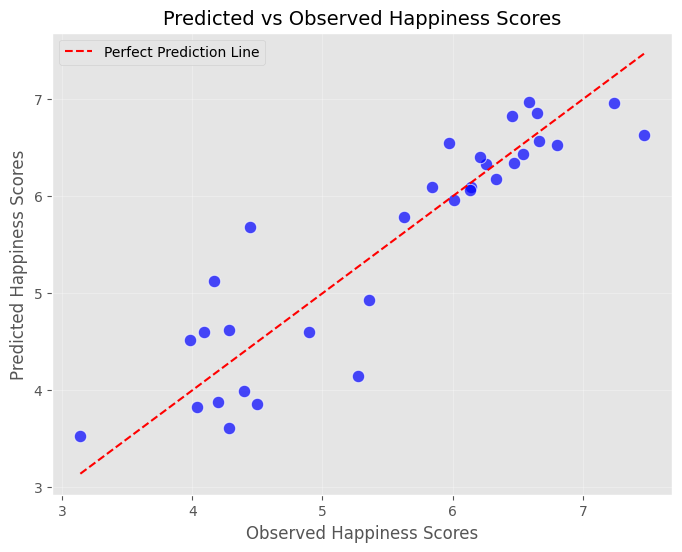

In [ ]:

# Scatter plot of Predicted vs Observed Happiness Scores
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=output['OBSERVED_HAPPINESS_SCORES'],
    y=output['PREDICTED_HAPPINESS_SCORE'],
    color='blue',
    alpha=0.7,
    s=80
)
plt.plot(
    [output['OBSERVED_HAPPINESS_SCORES'].min(), output['OBSERVED_HAPPINESS_SCORES'].max()],
    [output['OBSERVED_HAPPINESS_SCORES'].min(), output['OBSERVED_HAPPINESS_SCORES'].max()],
    color='red', linestyle='--', label='Perfect Prediction Line'
)
plt.title('Predicted vs Observed Happiness Scores', fontsize=14)
plt.xlabel('Observed Happiness Scores', fontsize=12)
plt.ylabel('Predicted Happiness Scores', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
output.head()

,PREDICTED_HAPPINESS_SCORE,OBSERVED_HAPPINESS_SCORES,L1_LOSS,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices
0,4.60,4.09,0.51,-1.423306,-0.13,-0.75,-0.60
1,6.53,6.80,0.27,1.043199,0.65,0.93,0.58
2,5.96,6.01,0.06,-0.417232,0.59,0.06,1.34
3,3.61,4.28,0.67,-1.497487,-1.67,-1.24,-1.71
4,6.57,6.66,0.10,1.040880,0.85,1.28,0.28


**MAke predictions with random values**

Define function to predict happiness score from known values

In [ ]:
def predict_for_known_values(model, known_values):
    known_values = np.array(known_values).reshape(1, -1)

    # Predict the happiness score
    predicted_happiness = model.predict(known_values)

    # Extract the prediction and convert it to a float
    return float(predicted_happiness[0][0])


In [ ]:
#Predict happiness score using some random values for the features
random_values = [0.6, 0.34, 0.23, 0.56]


In [ ]:
predicted_happiness = predict_for_known_values(model_3, random_values)
print(f"Predicted Happiness Score: {predicted_happiness:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
Predicted Happiness Score: 6.13


In [ ]:
print(model_3)

<Sequential name=sequential_24, built=True>


In [ ]:
#I want to predict the happiness score for the following features in row 56
row56 = df.iloc[56]
print(row56)

country                               South Korea
region                                  East Asia
happiness_score                             5.951
gdp_per_capita                           1.033926
social_support                           0.097771
healthy_life_expectancy                  1.522558
freedom_to_make_life_choices            -0.631064
generosity                                  0.112
perceptions_of_corruption                   0.163
lifeexp_happiness                        3.588453
Avg_happiness_score_region               5.930167
deviation_from_avg_happiness_score       0.020833
region_mapped                                   5
Name: 56, dtype: object


In [ ]:
#I want to predict the happiness score for the following features in row 56
#gdp_per_capita	social_support	healthy_life_expectancy	freedom_to_make_life_choice
row56values = [1.033926, 0.097771, 1.522558, -0.631064]

In [ ]:
predicted_happiness = predict_for_known_values(model_3, row56values)
print('predicted happiness score for row South Korea is:')
print(f"Predicted Happiness Score: {predicted_happiness:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
predicted happiness score for row South Korea is:
Predicted Happiness Score: 6.04


In [ ]:
#Nigeria = df['country'] == 'Nigeria'
Nigeria_row = df[df['country'] == 'Nigeria']
#print(Nigeria_row)
Nigeria_row

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,lifeexp_happiness,Avg_happiness_score_region,deviation_from_avg_happiness_score,region_mapped
94,Nigeria,Sub-Saharan Africa,4.981,-0.792771,-0.45893,-1.762703,-0.617637,0.176,0.013,0.458252,4.382485,0.598515,9


In [ ]:
#Predict Nigeria happiness score
Nigeria_features = [-0.792771,	-0.45893,	-1.762703,	-0.617637]
predicted_happiness = predict_for_known_values(model_3, Nigeria_features)
print('predicted happiness score for Nigeria is:')
print(f"Predicted Happiness Score: {predicted_happiness:.2f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
predicted happiness score for Nigeria is:
Predicted Happiness Score: 4.64


THE MODEL WAS ABLE TO `PREDICT HAPPINESS_SCORE` USING `gdp_per_capita`,`social_support`, `healthy_life_expectancy` and `freedom_to_make_life_choices` as **features**.
Atfter several tuning using the hyperparameters, the output was generated using the following parameters:
`learning_rate` = **0.005**
`epochs` = **1000**
`batch_size` = **32**

At `loss` of **0.1956** and `root_mean_squared_error` of **0.4412**, the model performance is good and it produced weights as follows for each of the features:

`Weight for feature[gdp_per_capita]`: **0.453**
`Weight for feature[social_support]`: **0.390**
`Weight for feature[healthy_life_expectancy]`: **0.111**
`Weight for feature[freedom_to_make_life_choices]`: **0.274**

and `Bias`: **5.543**

Hence,

Happiness_score = 0.453 * `gdp_per_capita` + 0.390 * `social_support` + 0.111 * `healthy_life_expectancy` + 0.274 * `freedom_to_make_life_choices` + 5.543

Gdp_per_capita and social_support are the most important factor here is determining happiness score.